# Test the reproject pipeline, now that WCS errs are calculated

In [1]:
# Load the results from running the pipeline on Oct 12 2023

#use py3.10 not py310 as kernel, otherwise the pickles won't load, not sure why, was giving 'no module found np._core error'

In [5]:
import _pickle as cPickle
import json
import sunpy
import sunpy.map
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [39]:
font = {'family' : 'Open Sans',
        'weight' : 'normal',
        'size'   : 15}

import matplotlib as mpl
mpl.rc_file_defaults()
plt.rc('font', **font)
mpl.rcParams['image.origin'] = 'lower'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

import sunpy.visualization.colormaps as cm
magmap = mpl.colormaps['hmimag']

In [6]:
out_dir = '/data/slam/sinjan/arlongterm_pickles/'

In [7]:
with open(f"/data/slam/sinjan/arlongterm_pickles/HRTs_remapped_on_HMI_20231012.pickle", "rb") as input_file:
    hrts = cPickle.load(input_file)

In [5]:
len(hrts)

24

In [8]:
hrt_arr = np.zeros((650,650,24))

for i,smap in enumerate(hrts):
     hrt_arr[:,:,i] = smap.data[1900:2550,:650]

In [35]:
hrts[0].meta

MetaDict([('simple': 'True')
('bitpix': '32')
('naxis': '2')
('naxis1': '4102')
('naxis2': '4102')
('blank': '-2147483648')
('bzero': '0.0')
('bscale': '0.1')
('checksum': 'jAalm7WijAaij5Wi')
('datasum': '754757752')
('date': '2023-10-16T09:22:46.000')
('date-obs': '2023-10-12T00:20:44.600')
('telescop': 'SDO/HMI')
('instrume': 'HMI_FRONT2')
('wavelnth': '6173.0')
('camera': '2')
('bunit': 'Gauss')
('origin': 'SDO/JSOC-SDP')
('content': 'MAGNETOGRAM')
('quality': '0')
('quallev1': '0')
('history': 'Polynomial Coefficients used for Doppler velocity correction: 3.740305e+
02 2.242736e-03 -1.214613e-05 -7.307306e-10')
('comment': 'FITS (Flexible Image Transport System) format is defined in 'Astronomy
  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
De-rotation: ON; Un-distortion: ON; Re-centering: ON; Re-sizing: OFF; co
rrection for cosmic-ray hits; correction front/side intensity implemente
d for mod L; RSUNerr=5.0 pixels; dpath=/home/jsoc/cvs/Development/JSOC/p
ro

In [9]:
with open(f"/data/slam/sinjan/arlongterm_pickles/HMIs_target_20231012.pickle", "rb") as input_file:
    hmis = cPickle.load(input_file)

In [26]:
len(hmis)

24

In [33]:
hmis[0].meta['t_rec']

'2023.10.12_00:21:45.000_TAI'

In [10]:
hmi_arr = np.zeros((650,650,24))

for i,smap in enumerate(hmis):
     nans=np.isnan(hrt_arr[:,:,i])
     tmp = smap.data[1900:2550,:650]
     tmp[nans] = np.nan
     hmi_arr[:,:,i] = tmp

In [11]:
title=[smap.meta['date-obs'] for smap in hmis]

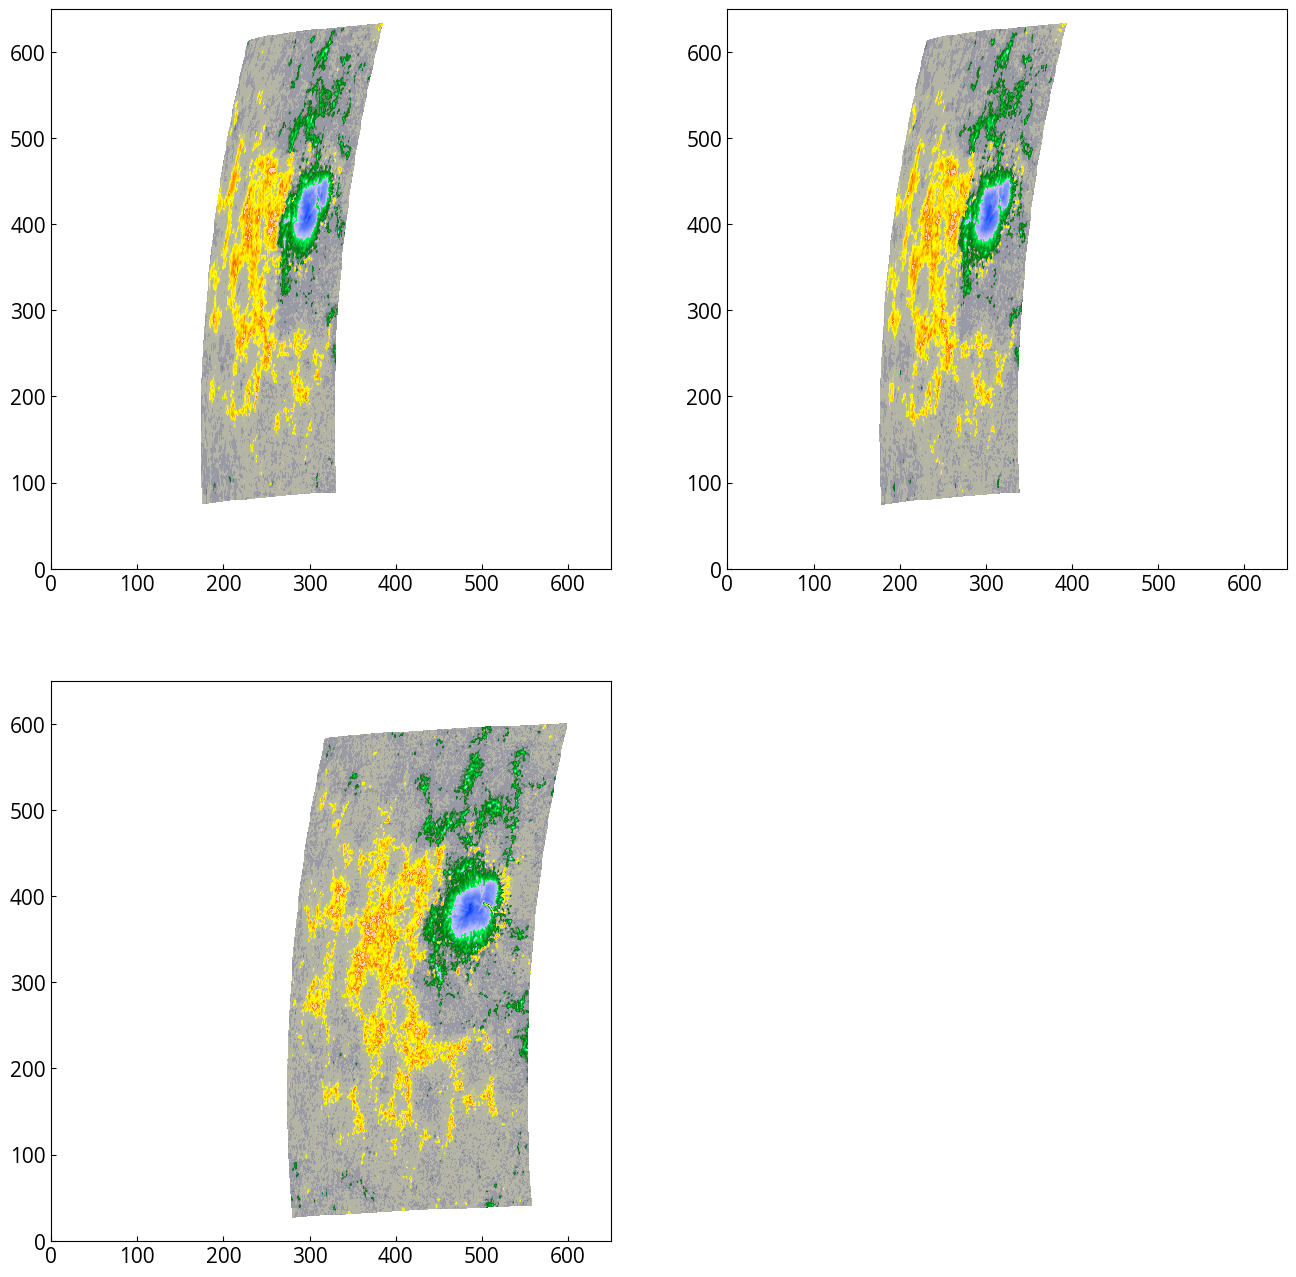

In [24]:
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(hrt_arr[...,0],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
plt.subplot(222)
plt.imshow(hrt_arr[...,1],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
plt.subplot(223)
plt.imshow(hrt_arr[...,23],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
plt.show()

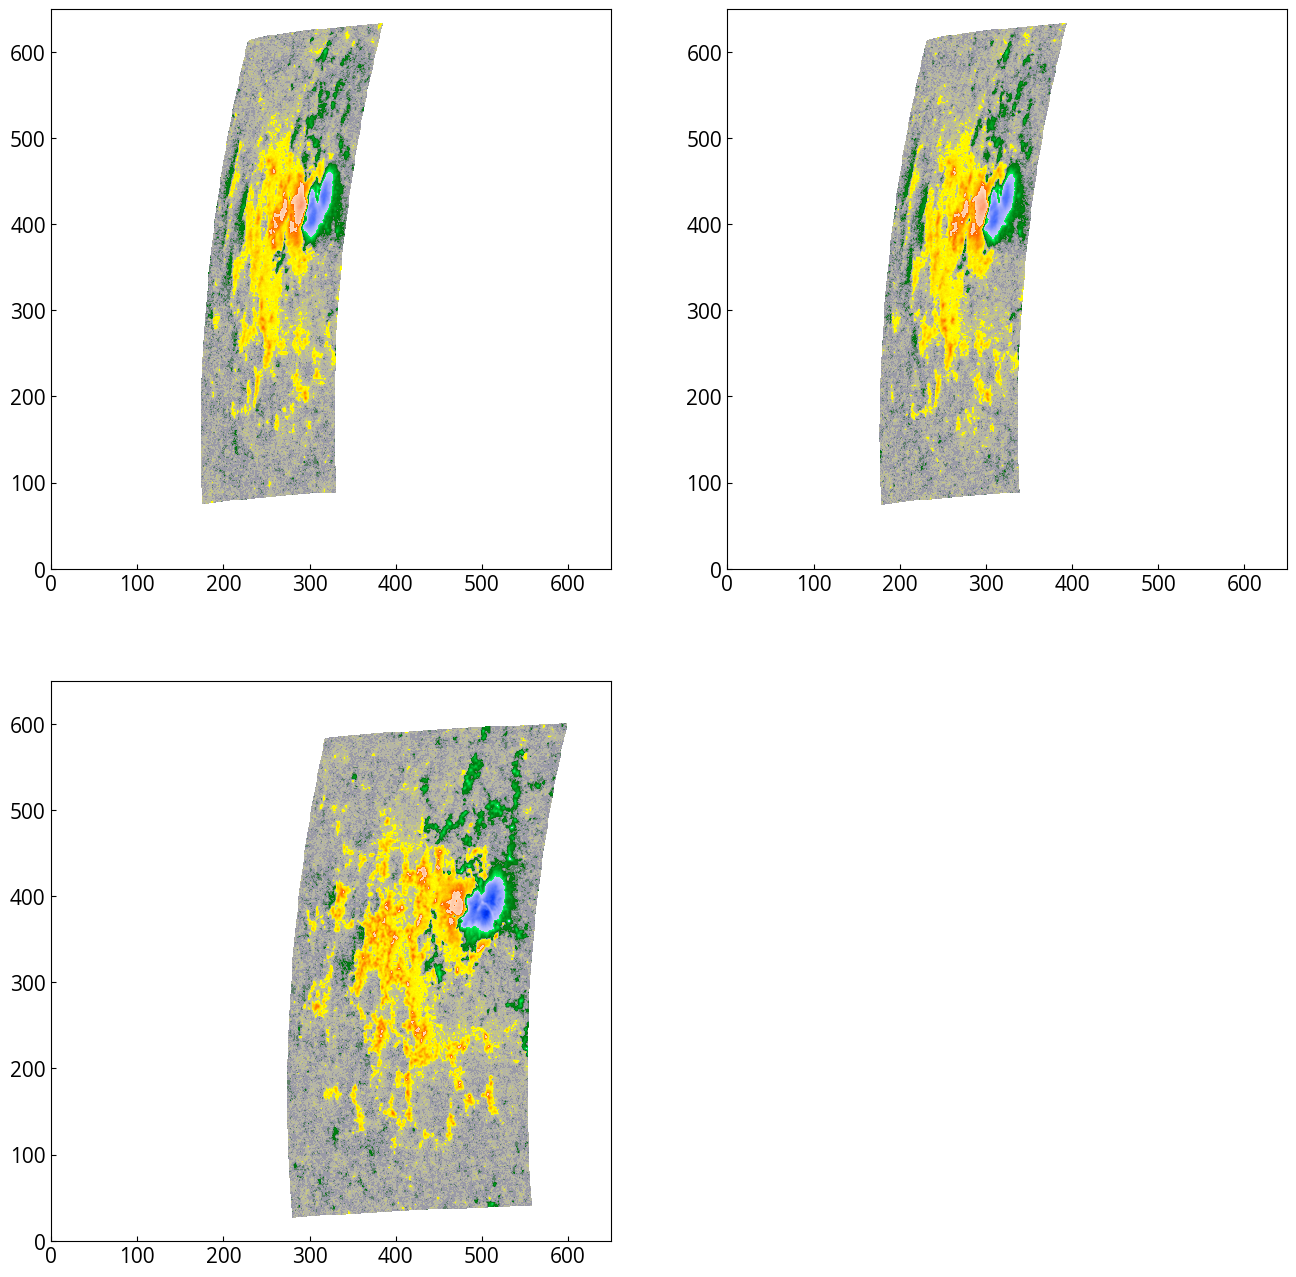

In [31]:
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(hmi_arr[...,0],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
plt.subplot(222)
plt.imshow(hmi_arr[...,1],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
plt.subplot(223)
plt.imshow(hmi_arr[...,23],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
plt.show()

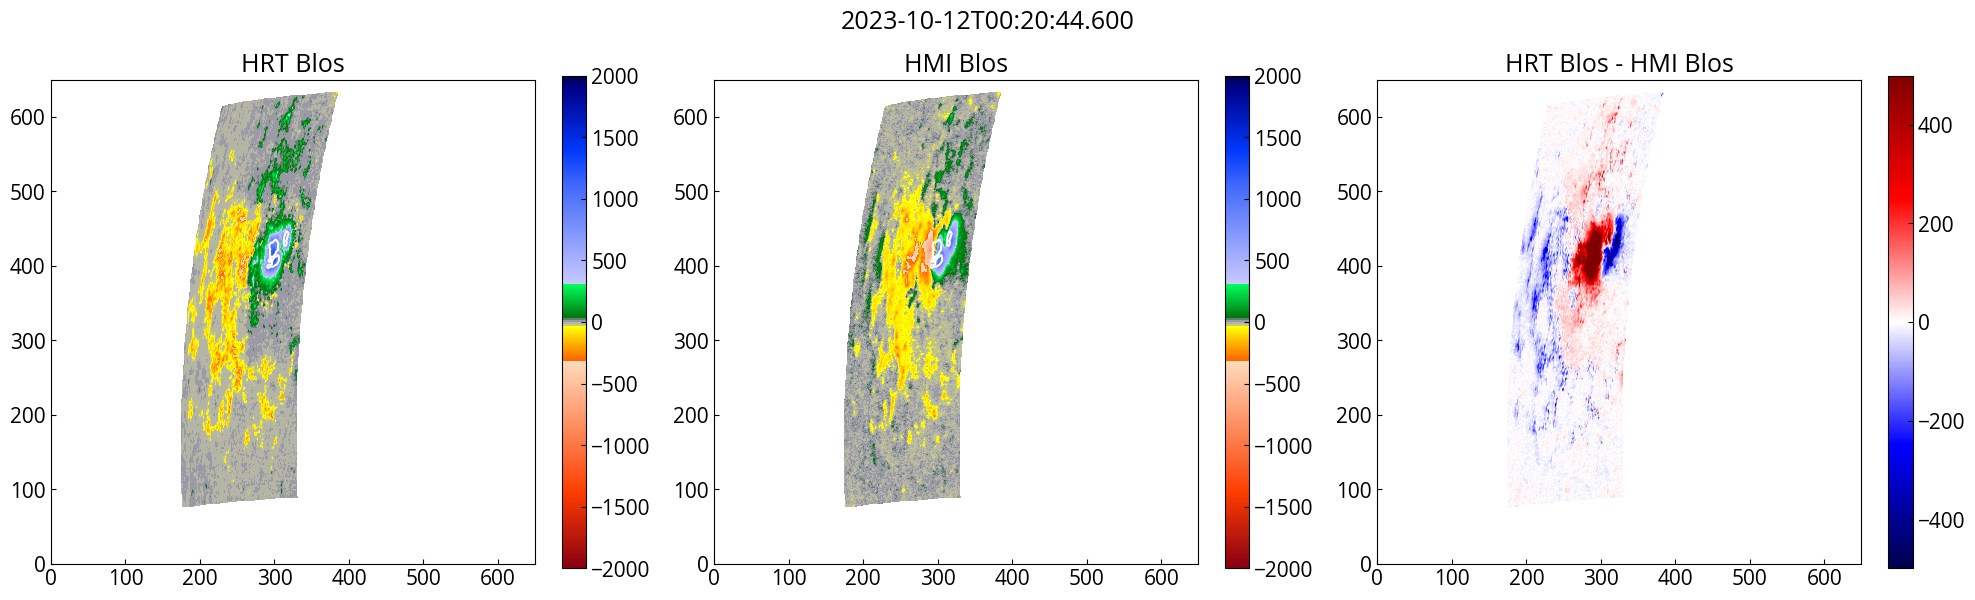

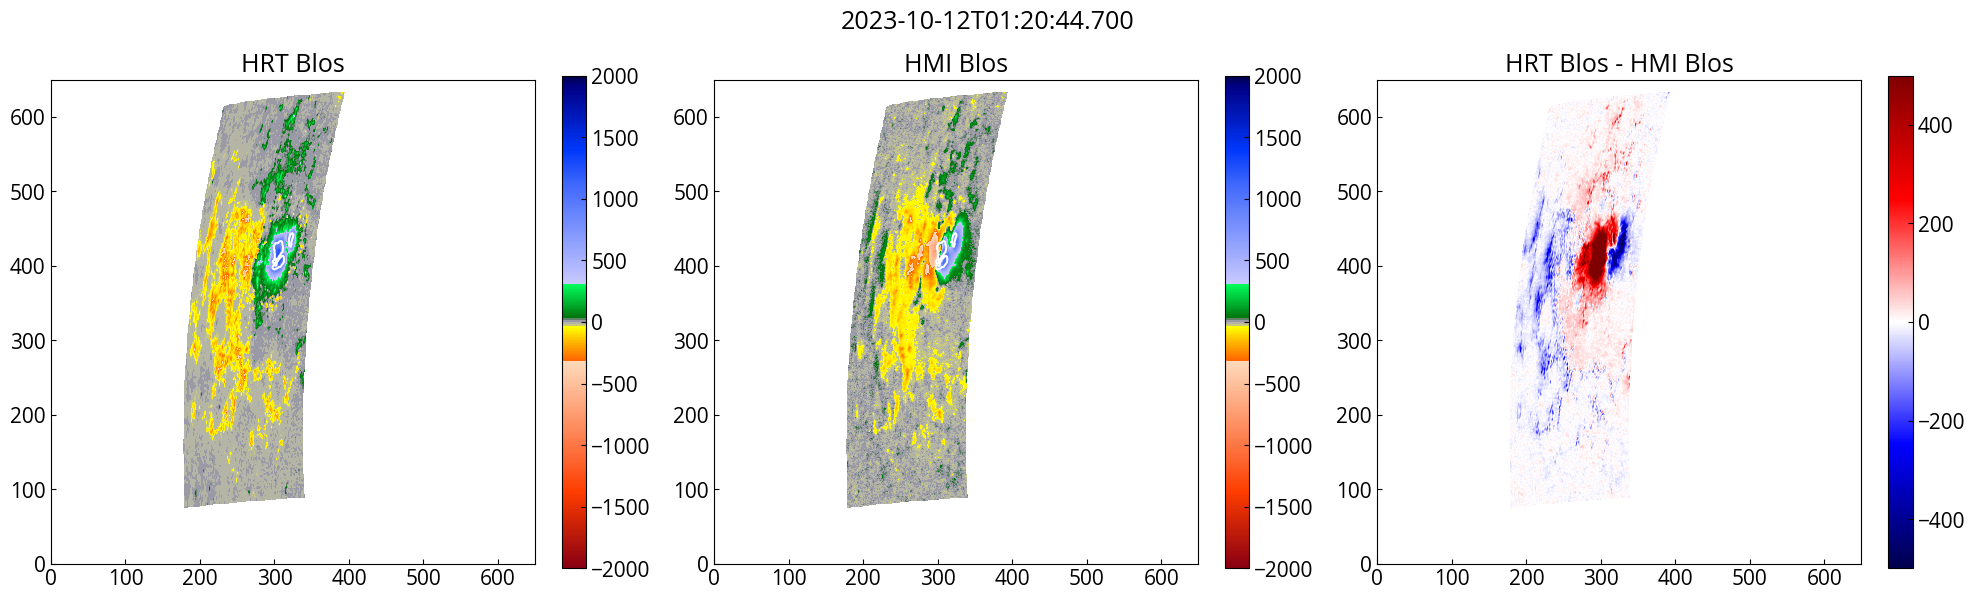

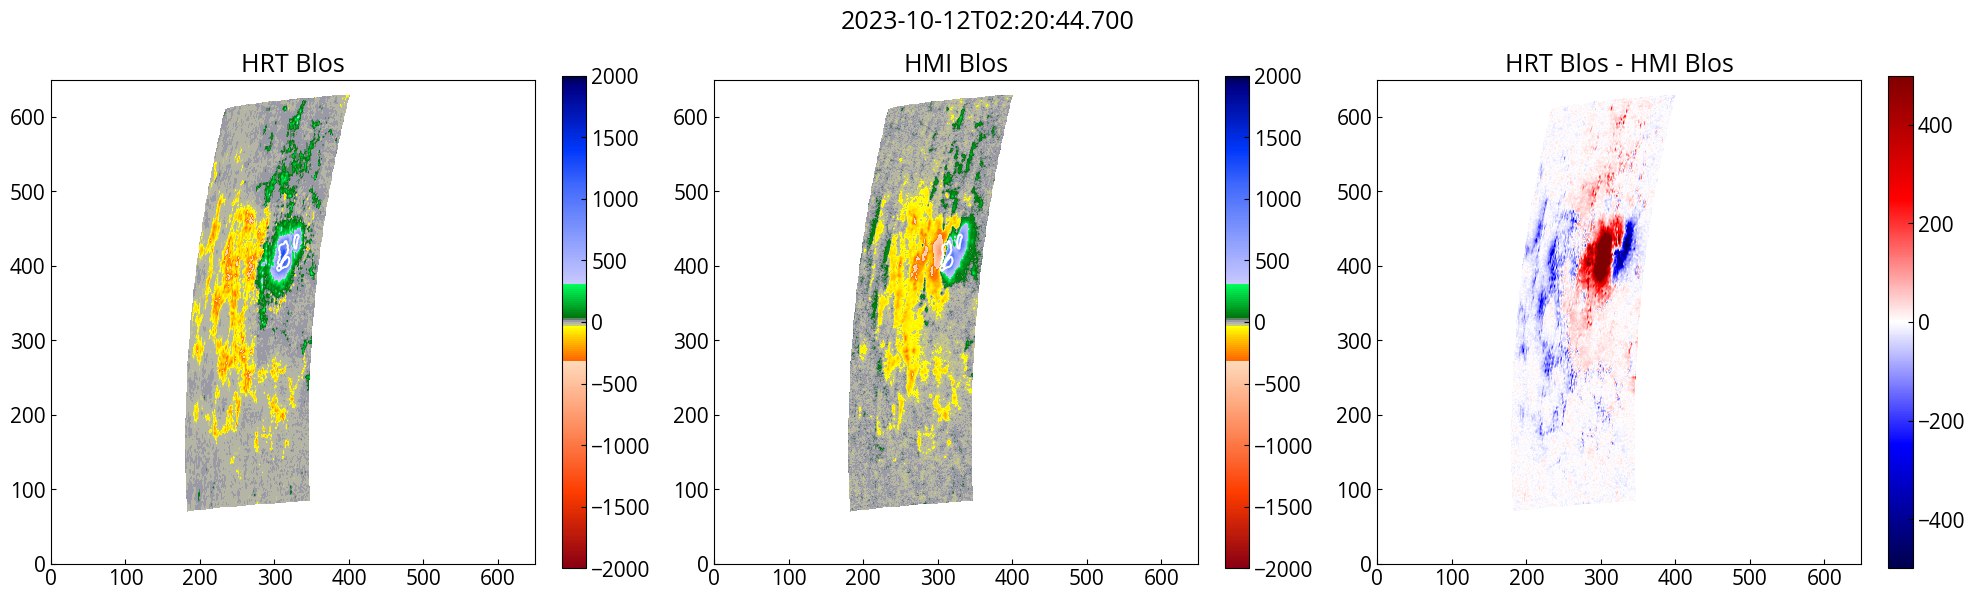

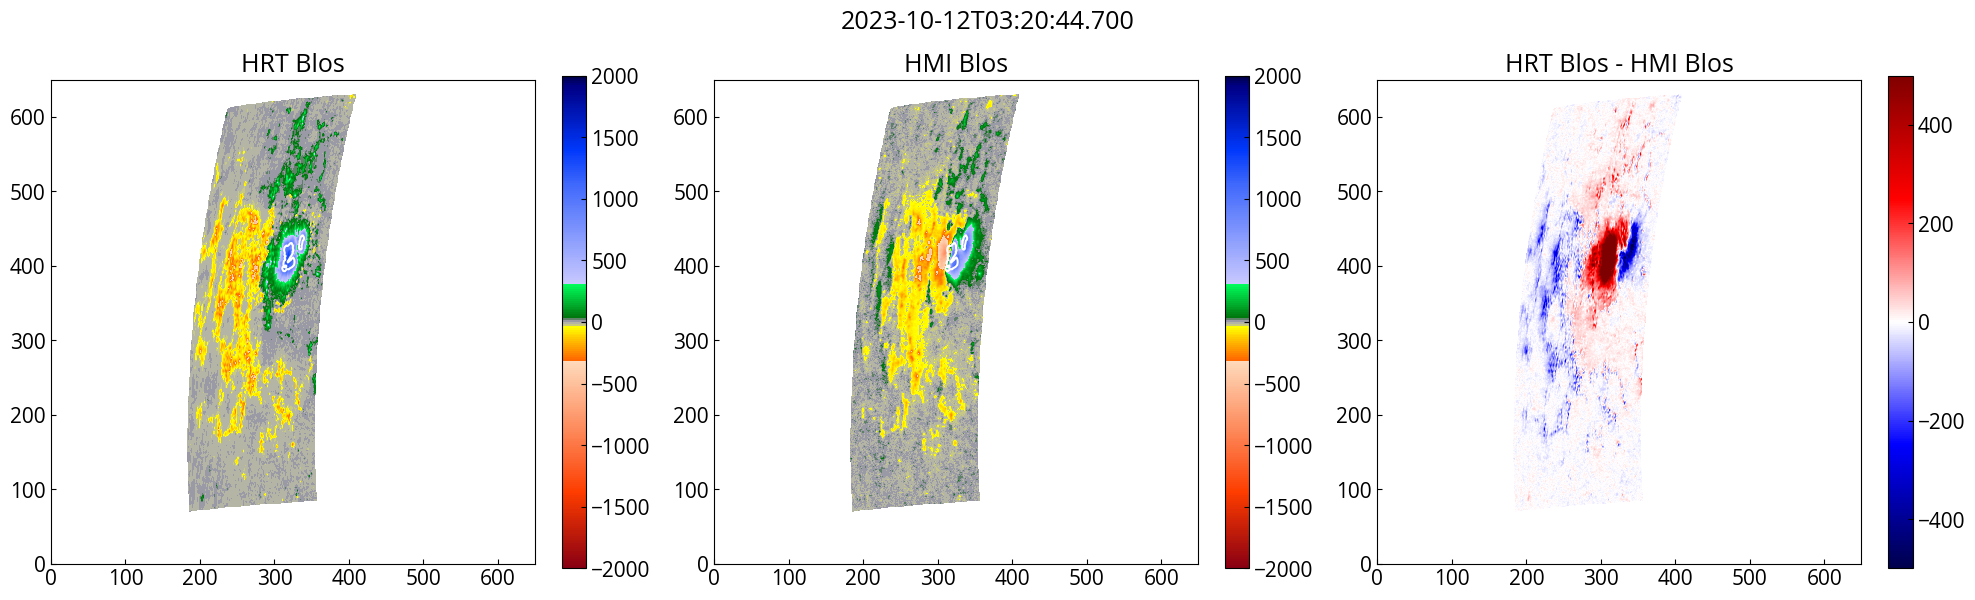

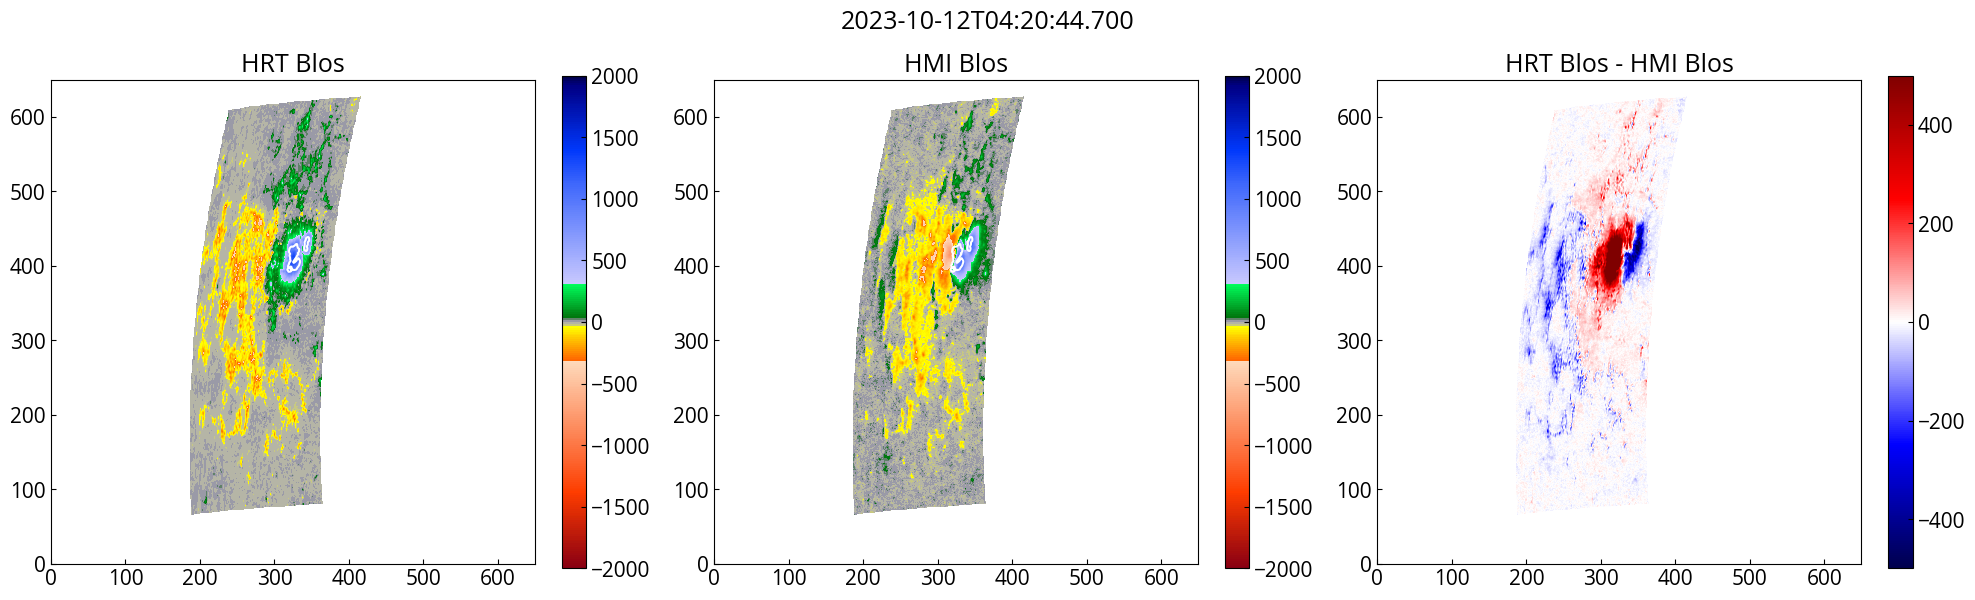

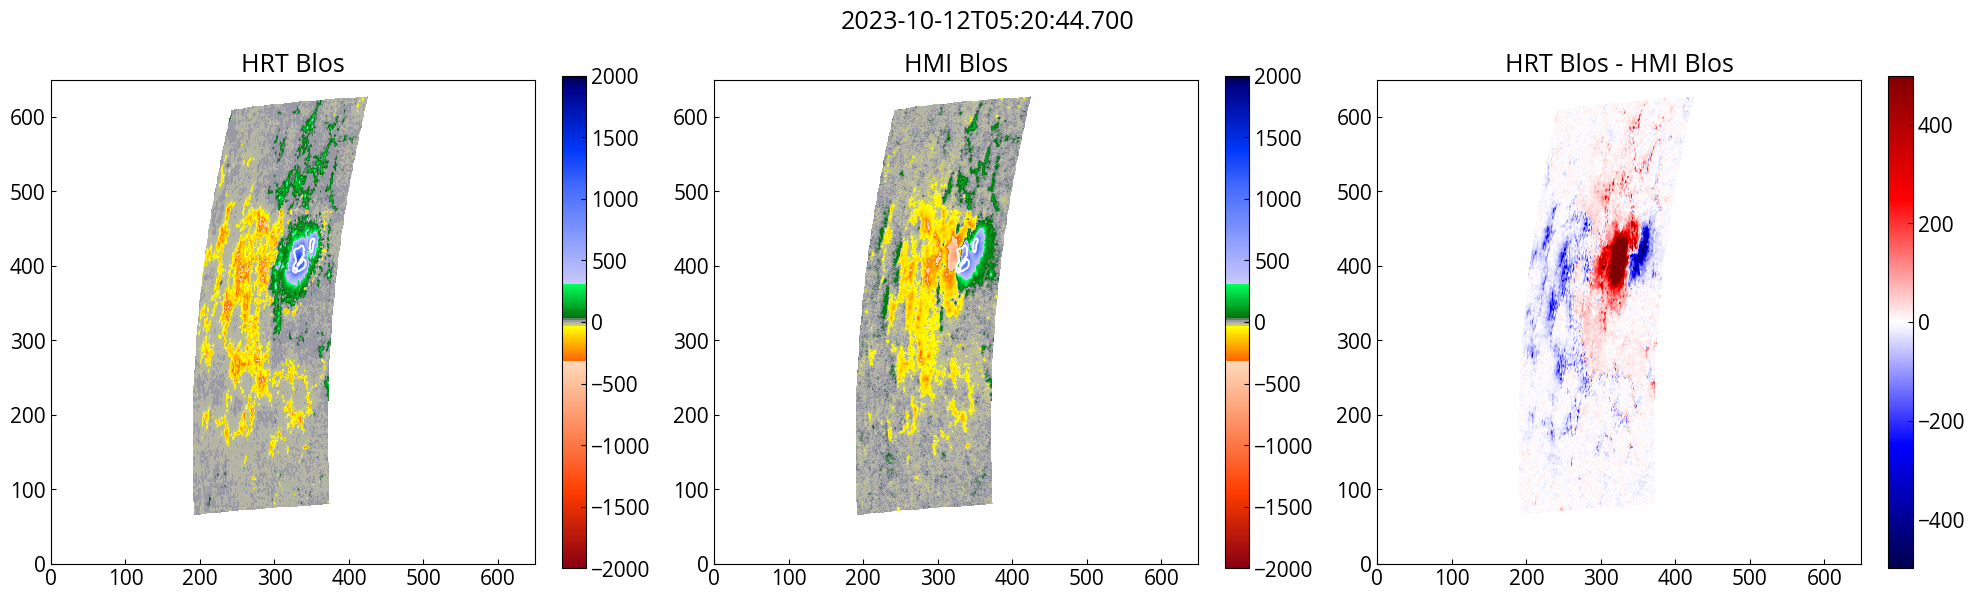

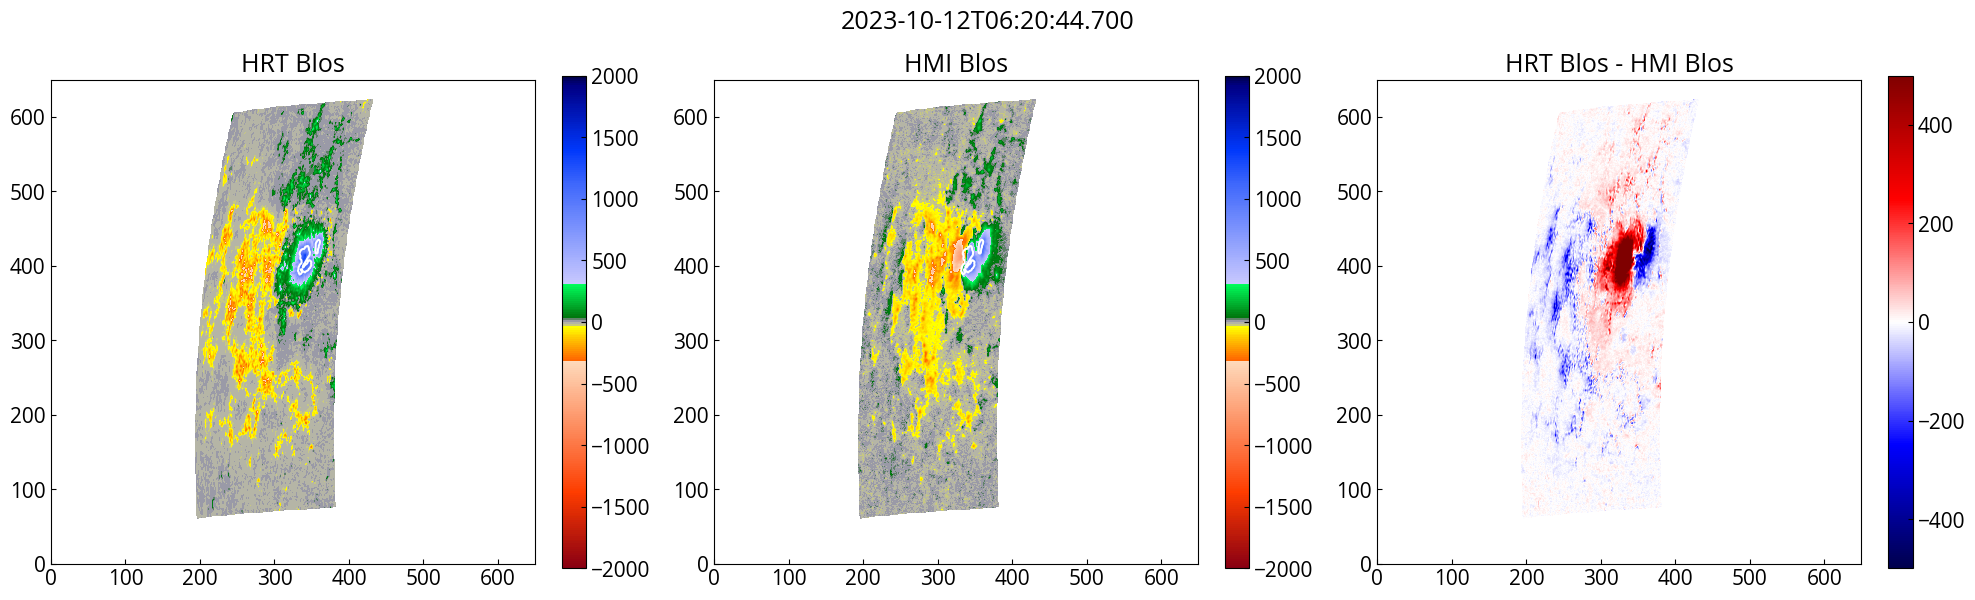

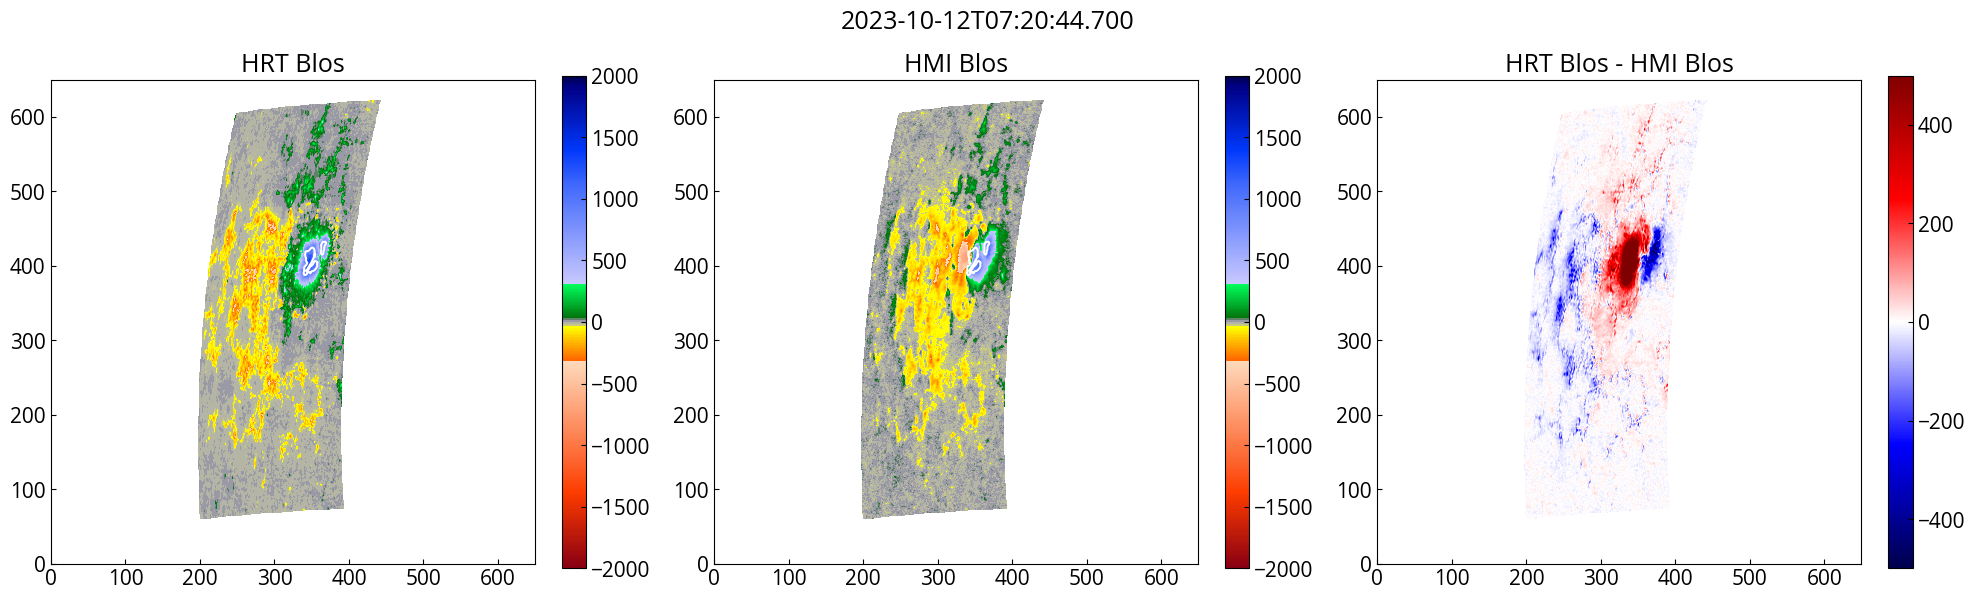

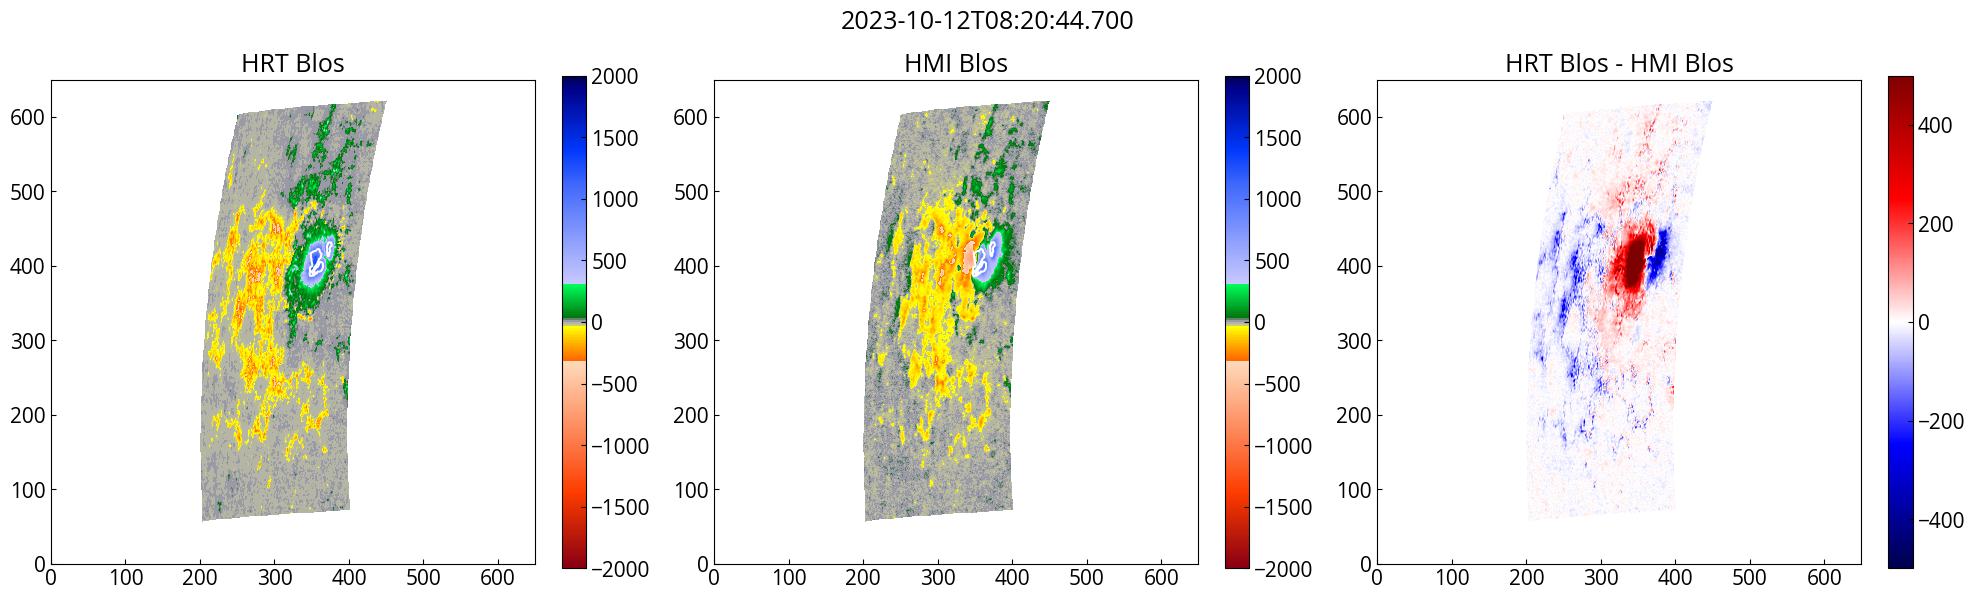

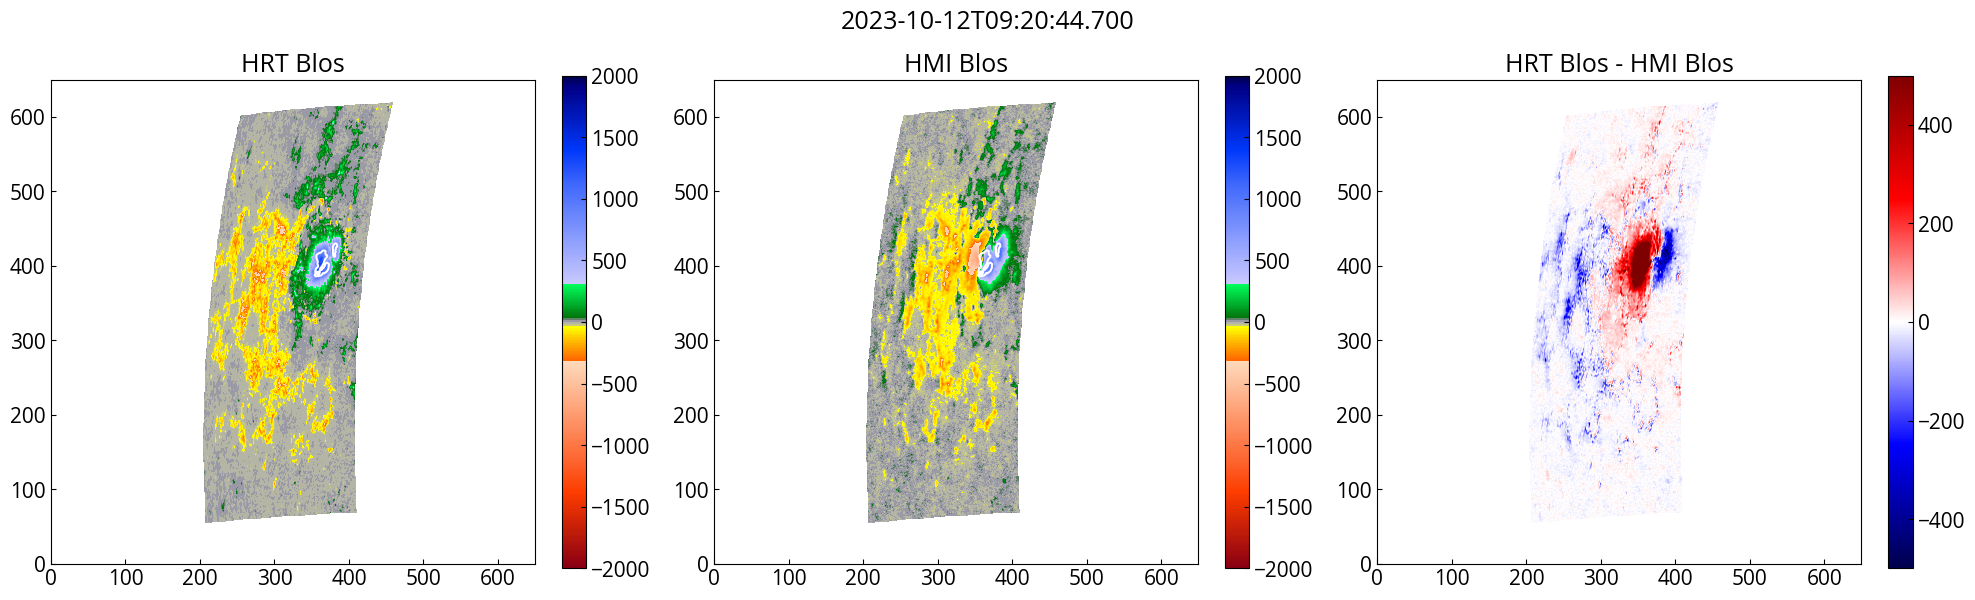

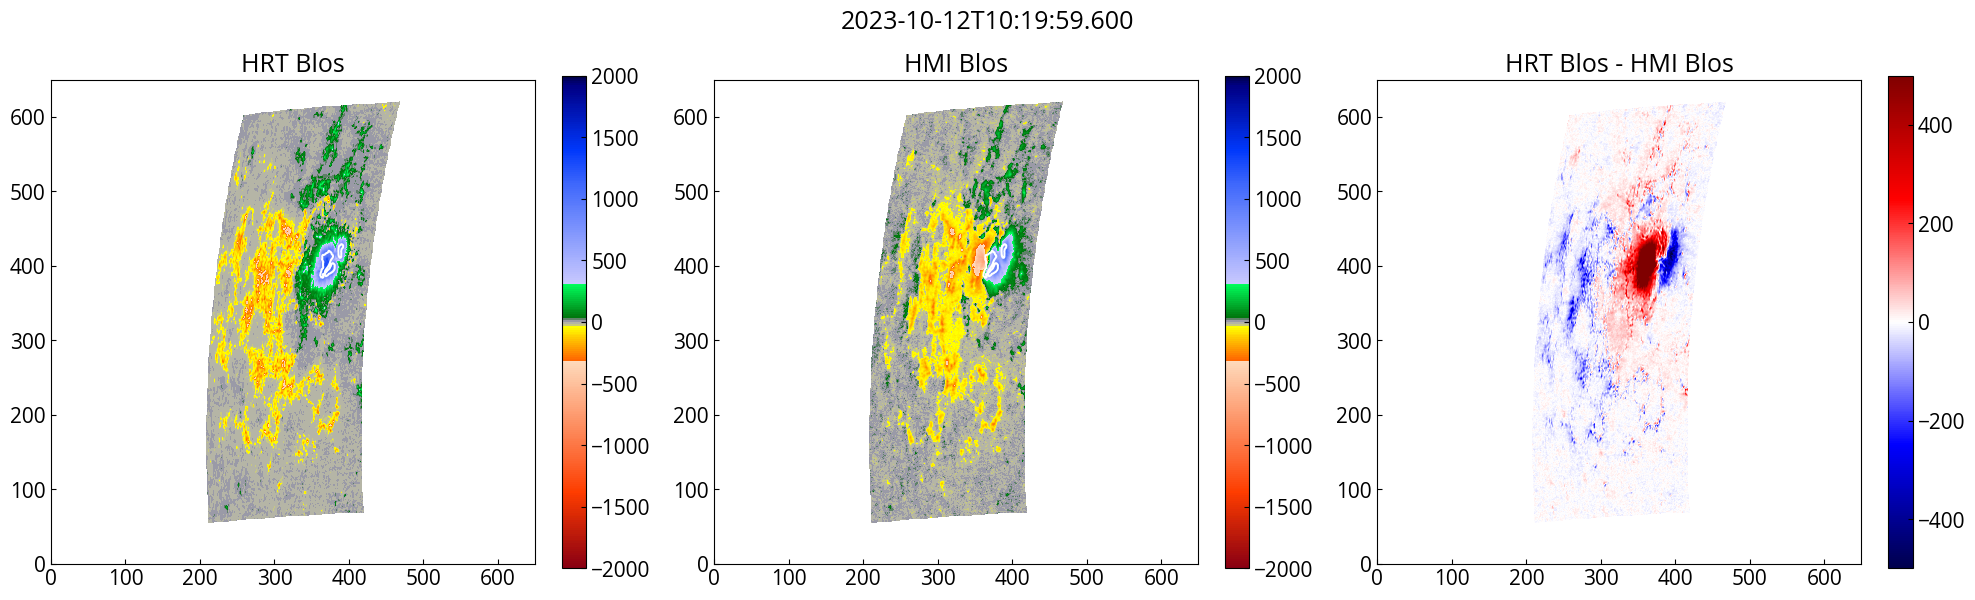

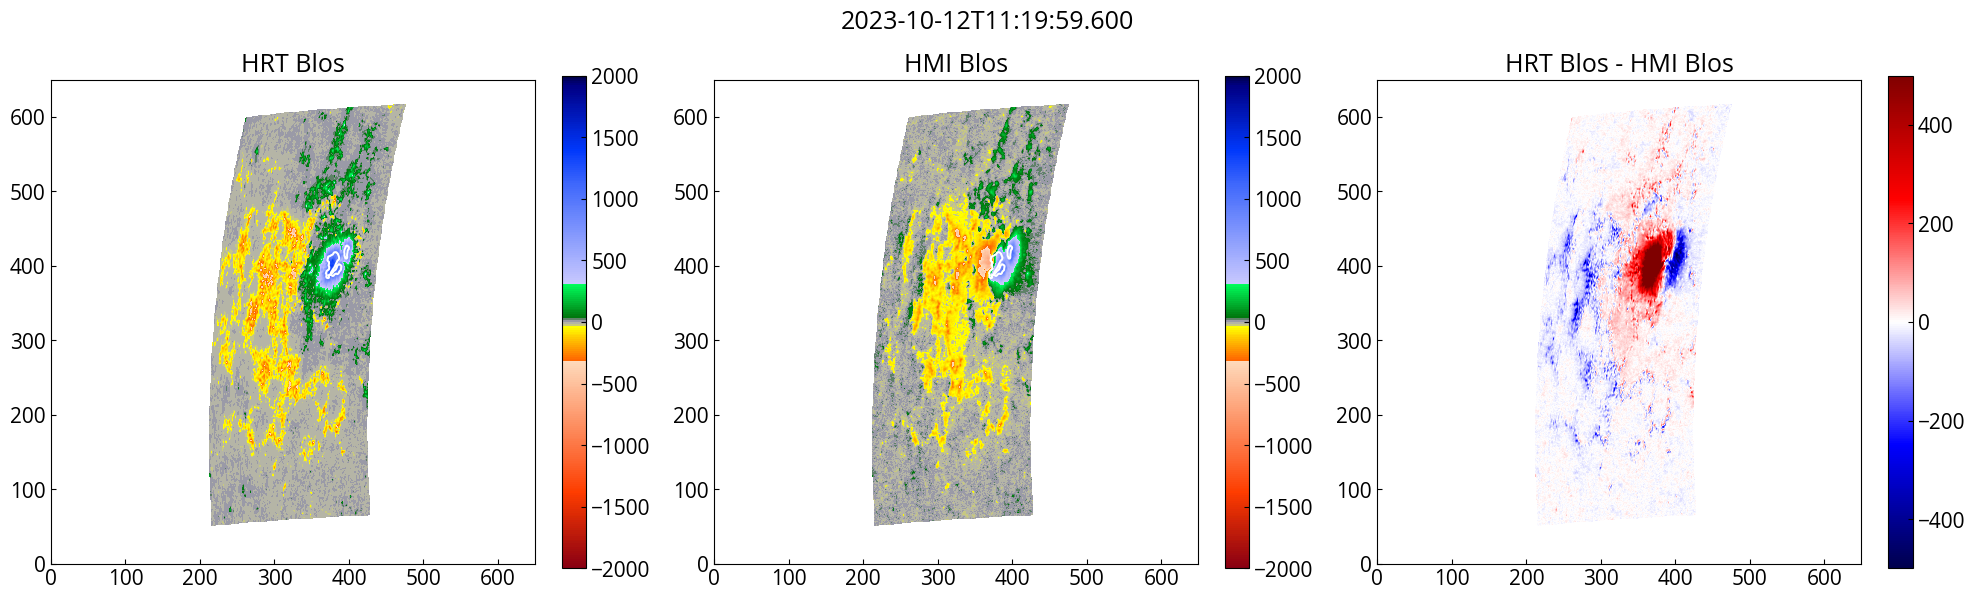

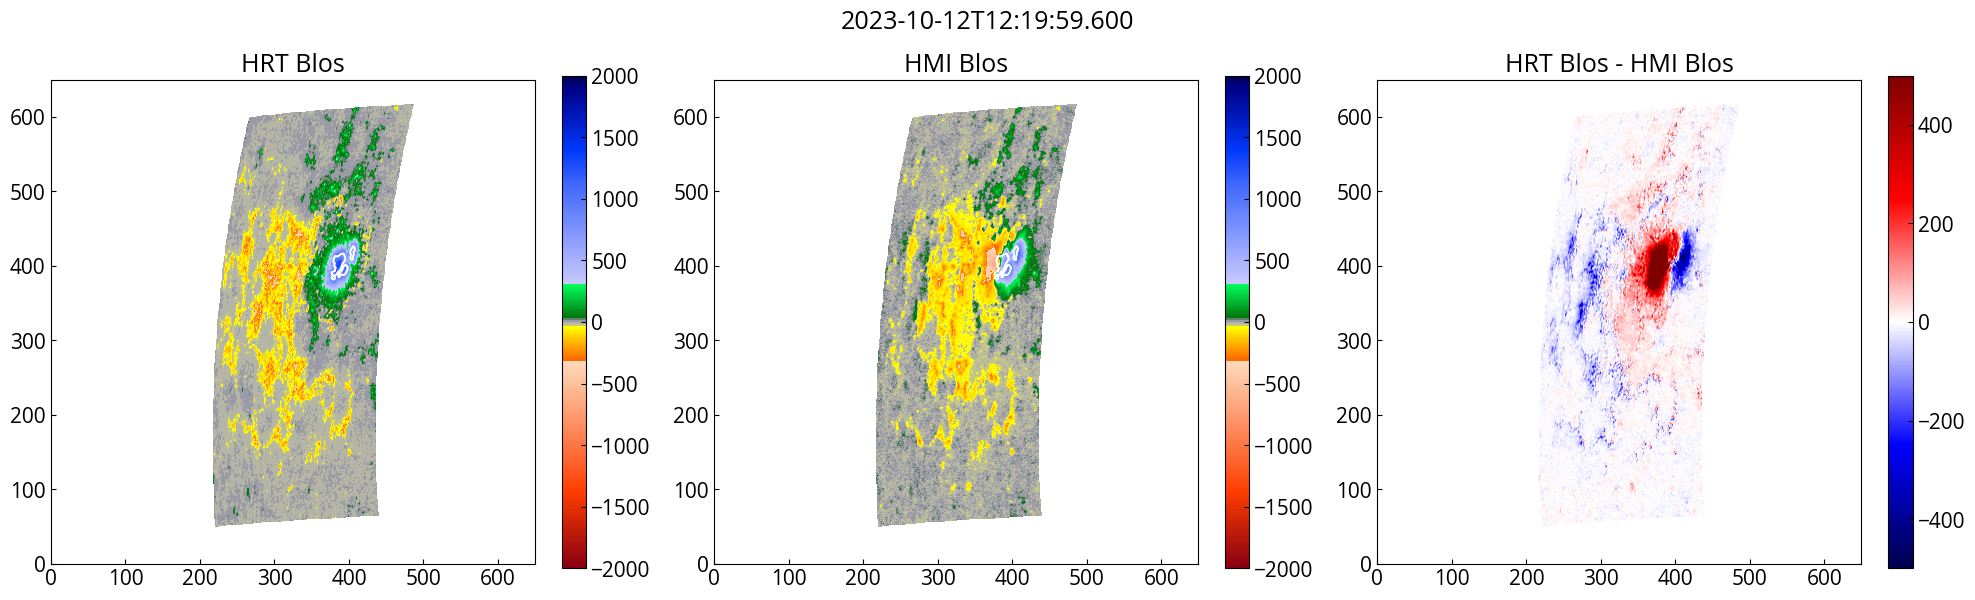

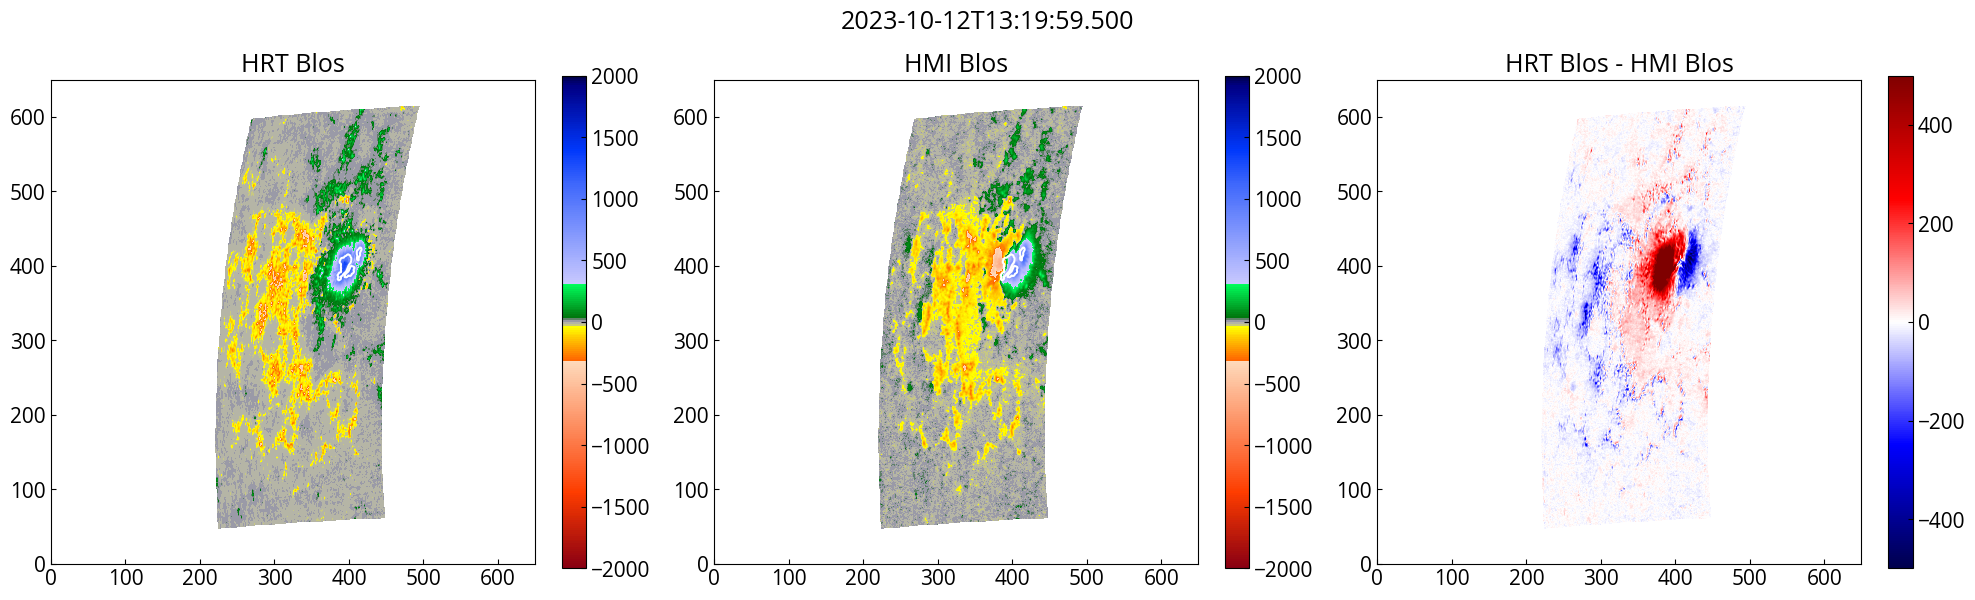

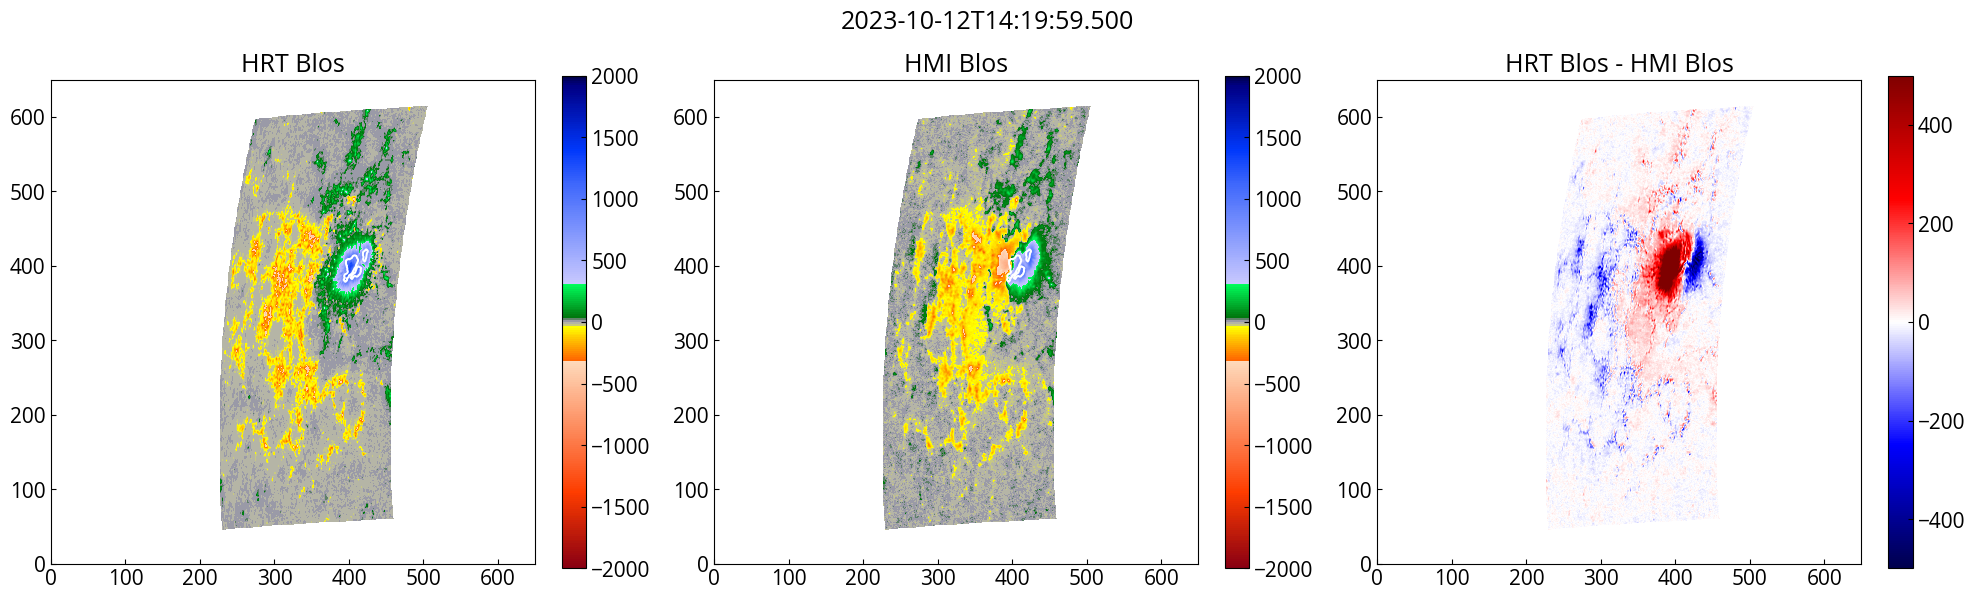

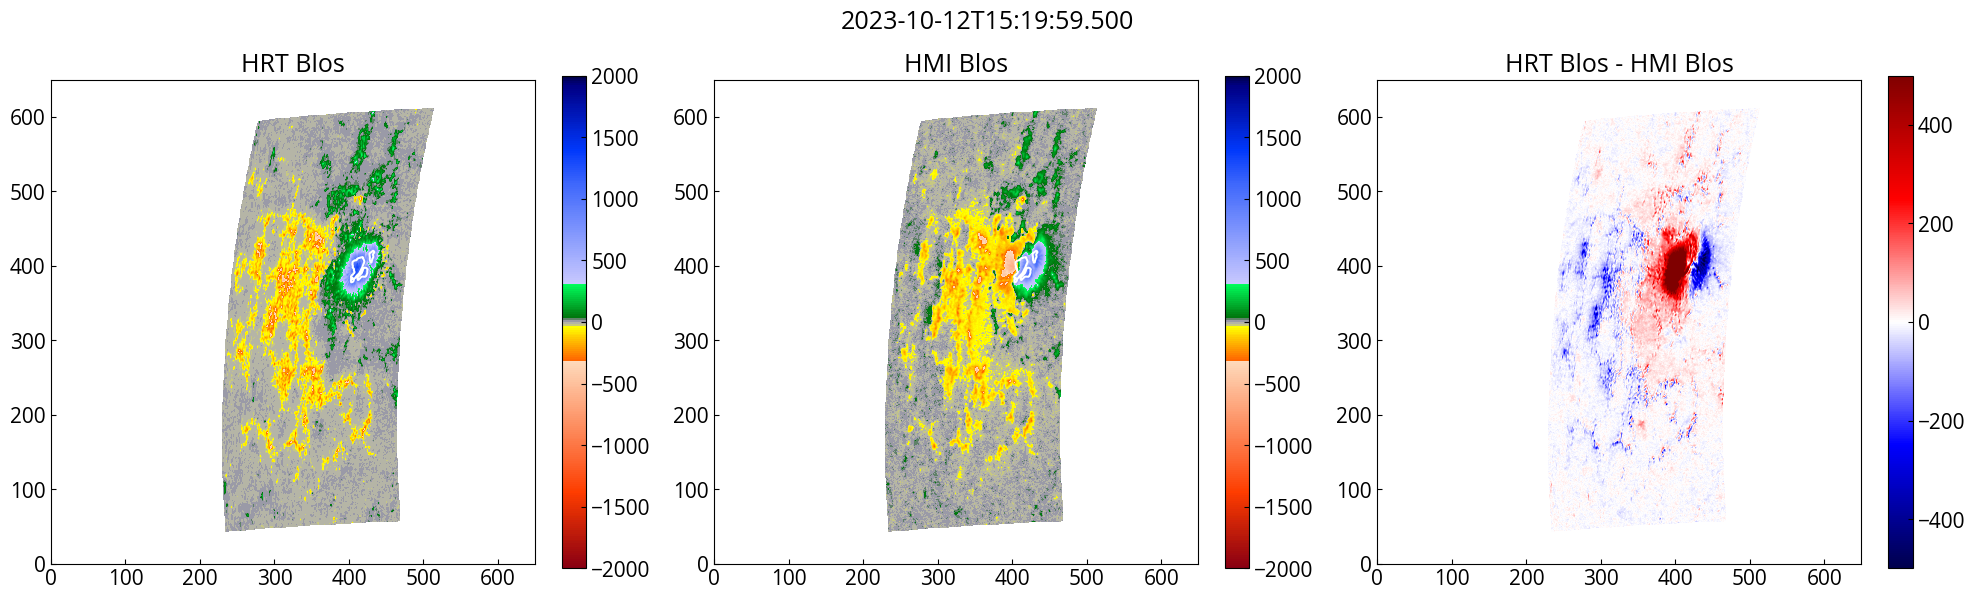

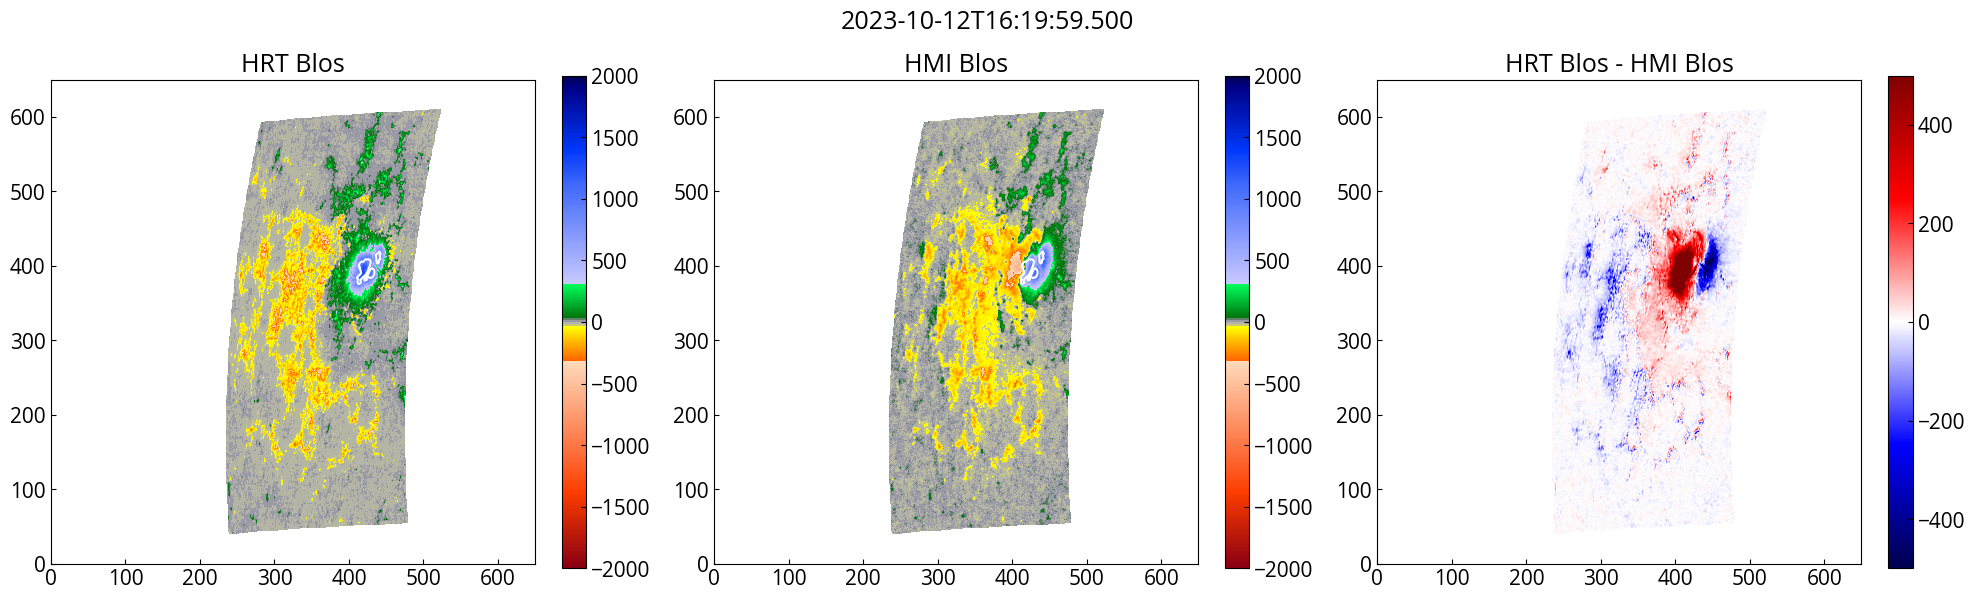

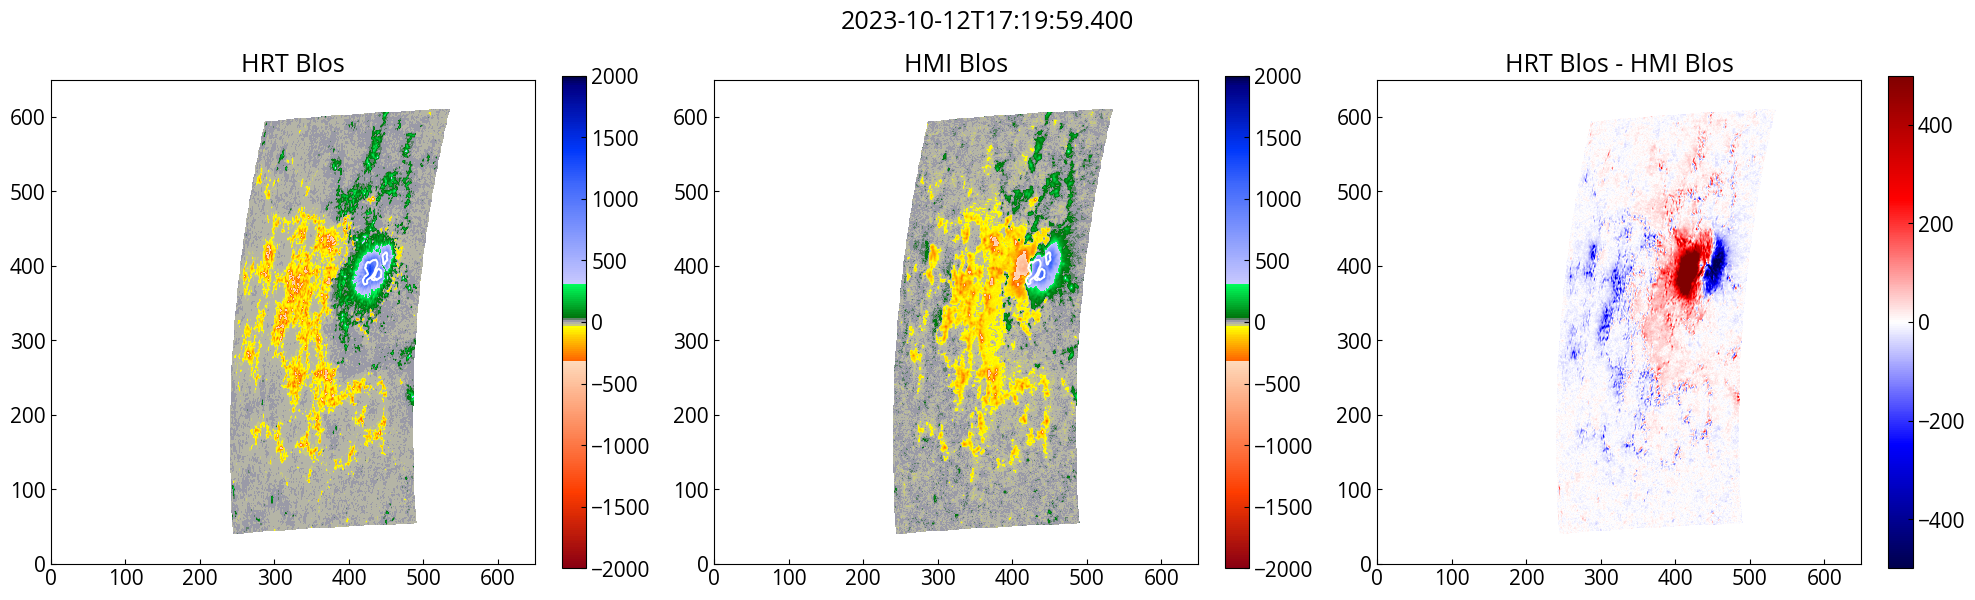

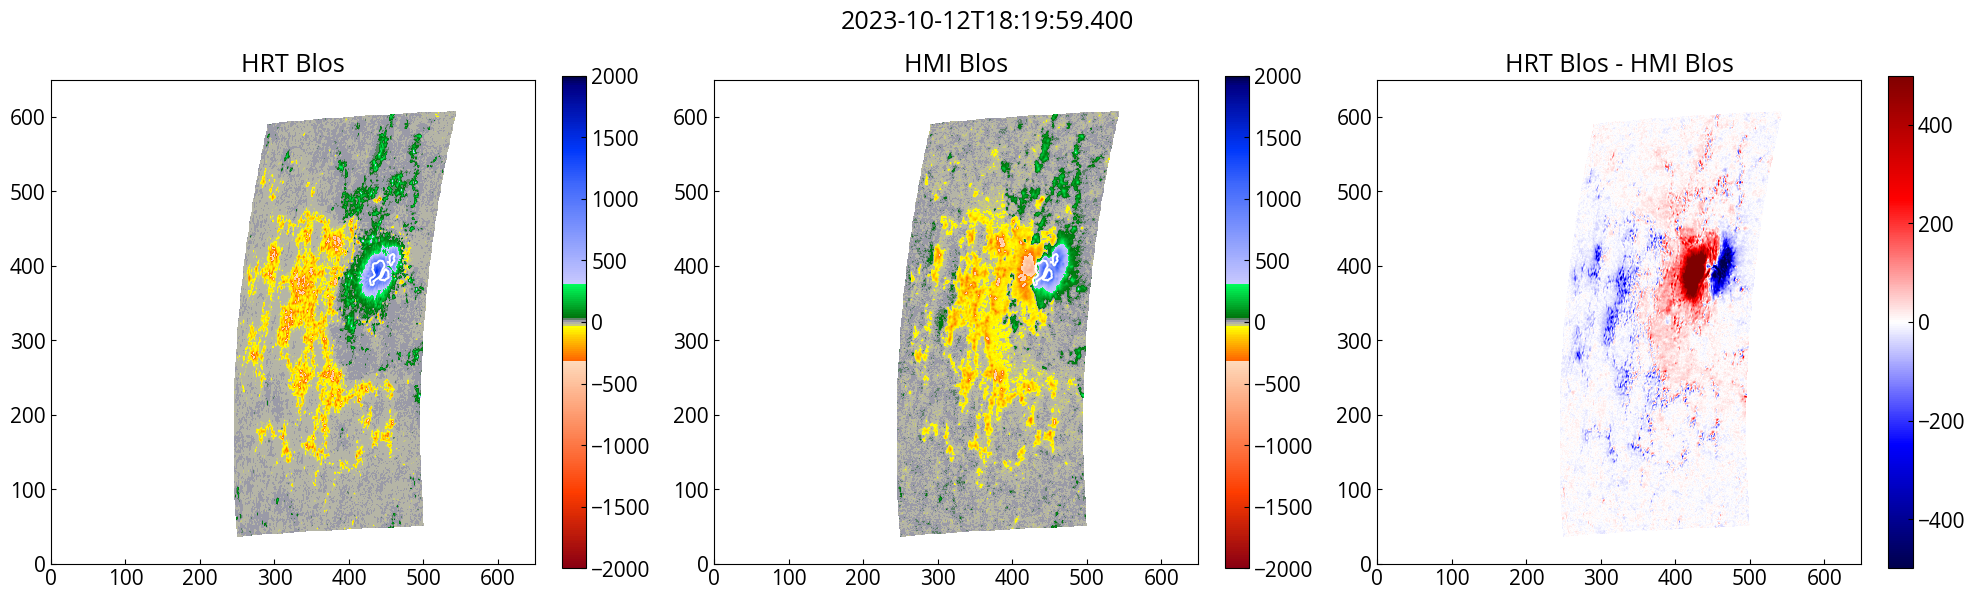

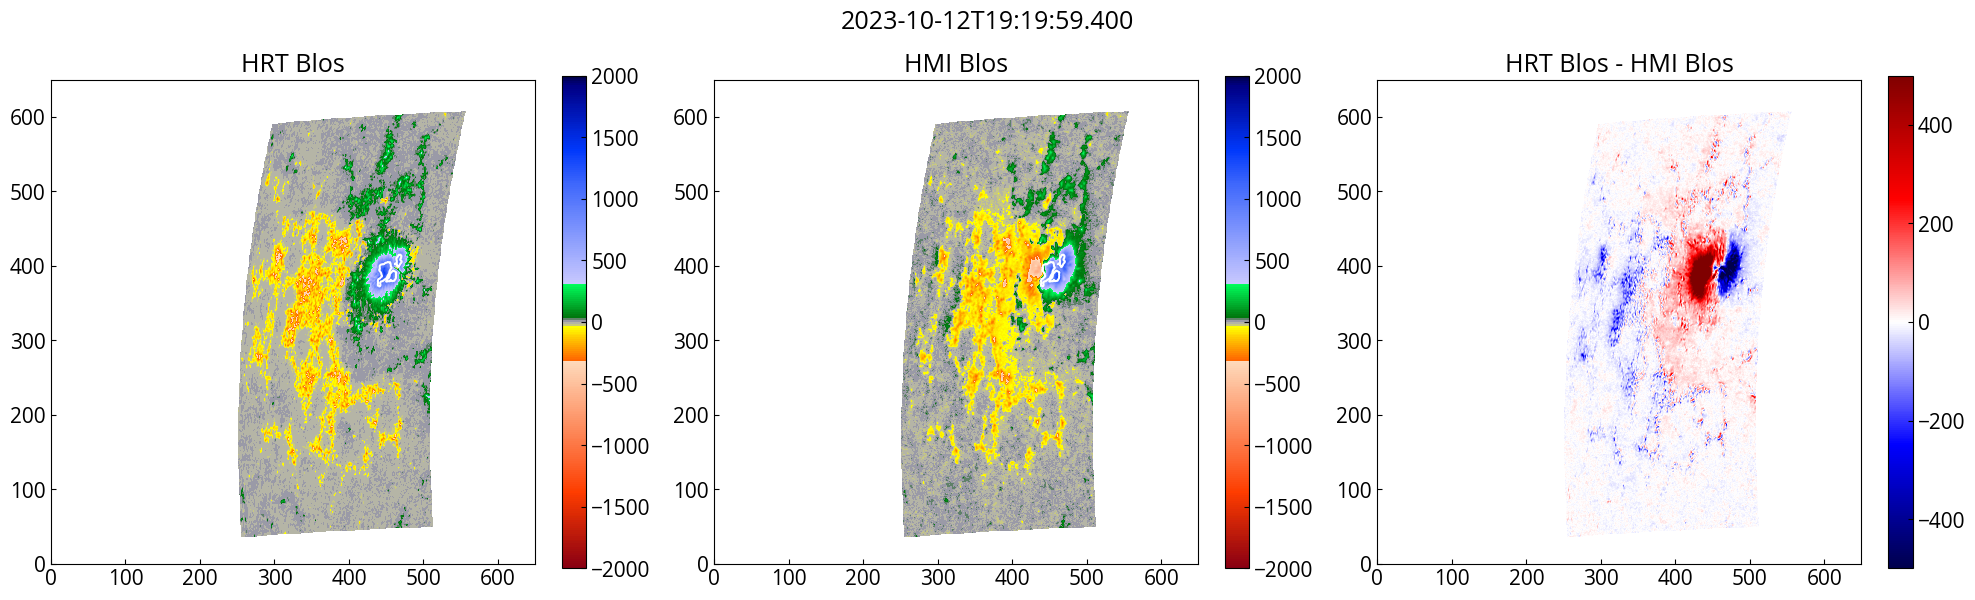

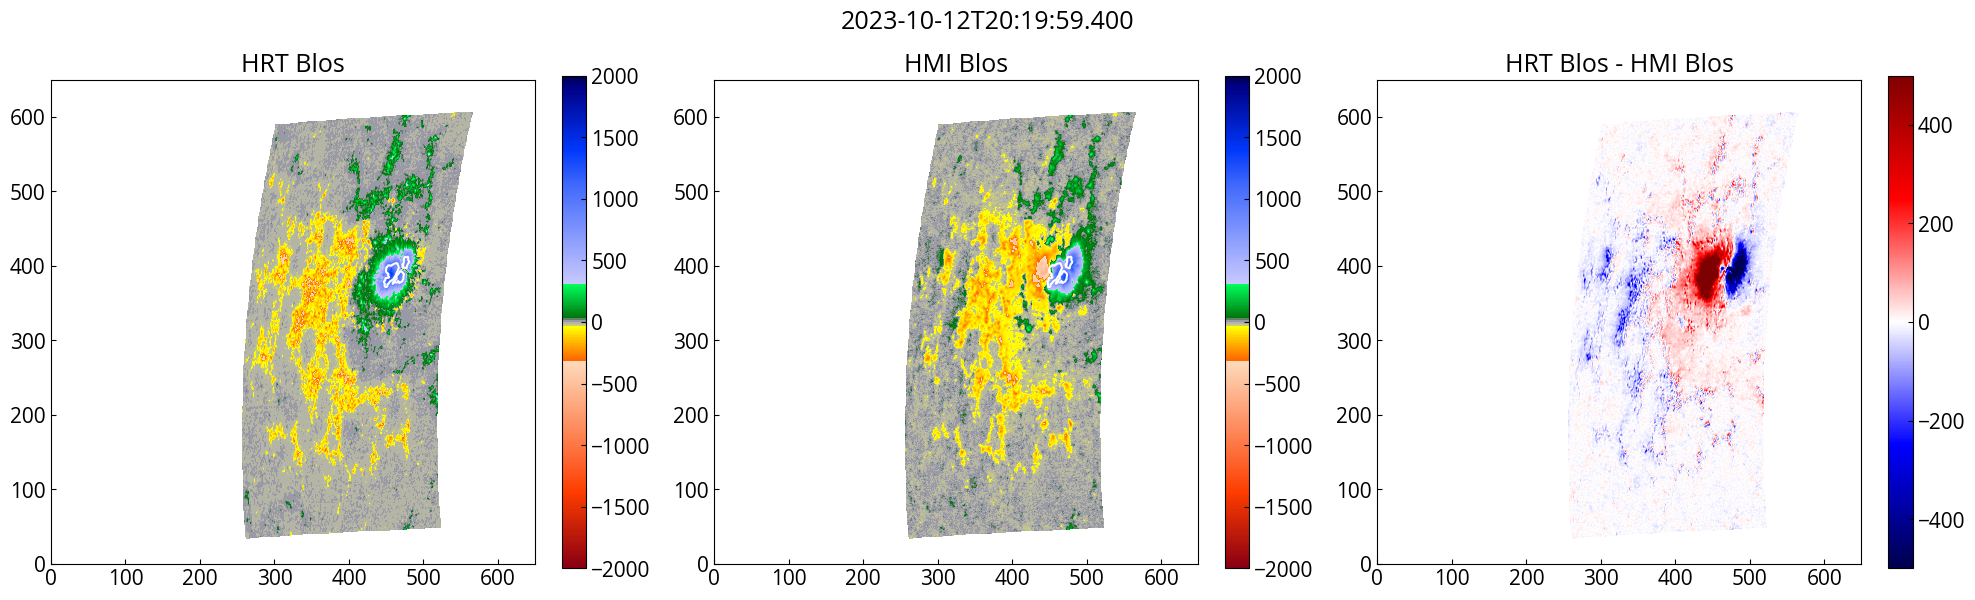

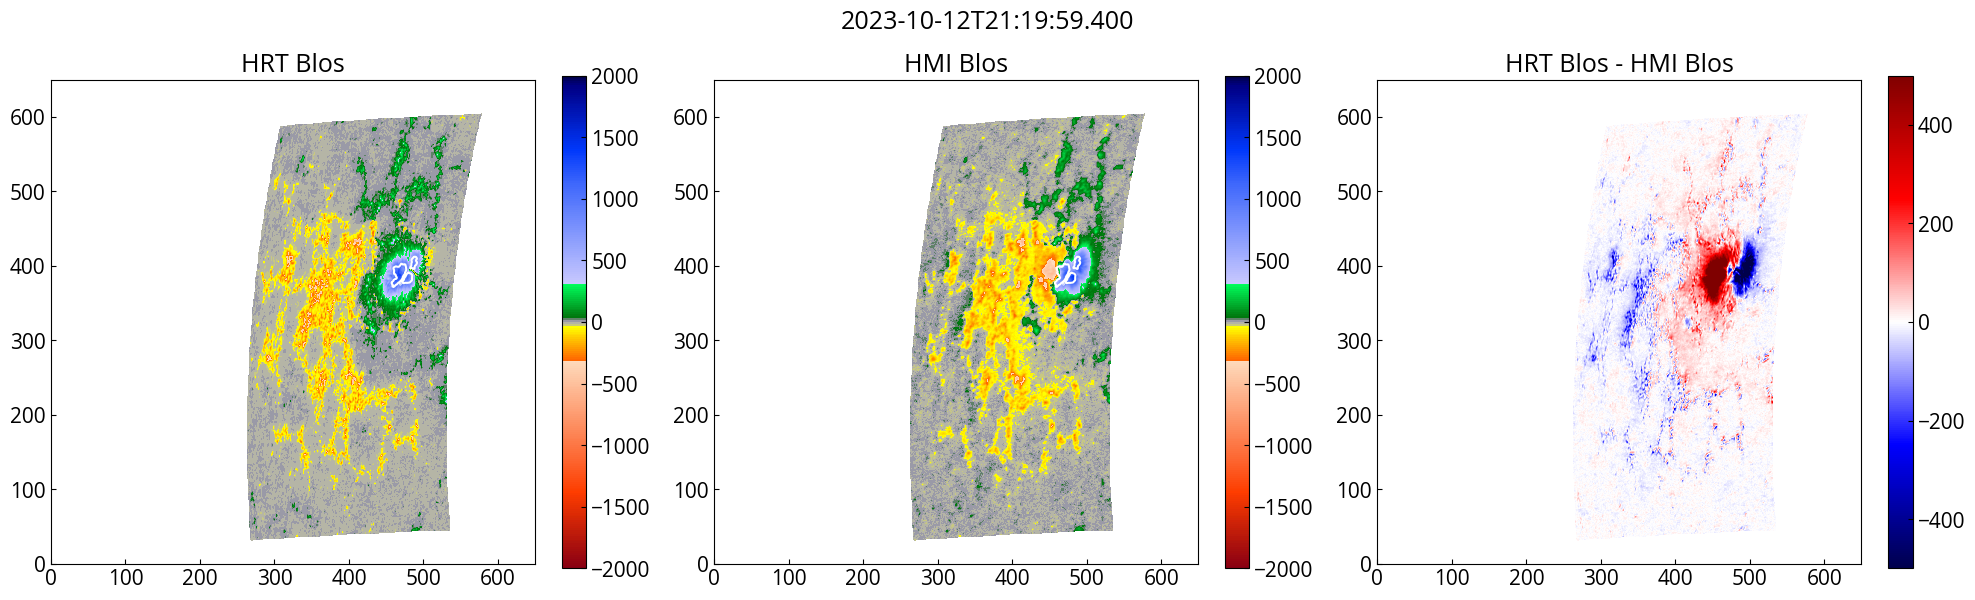

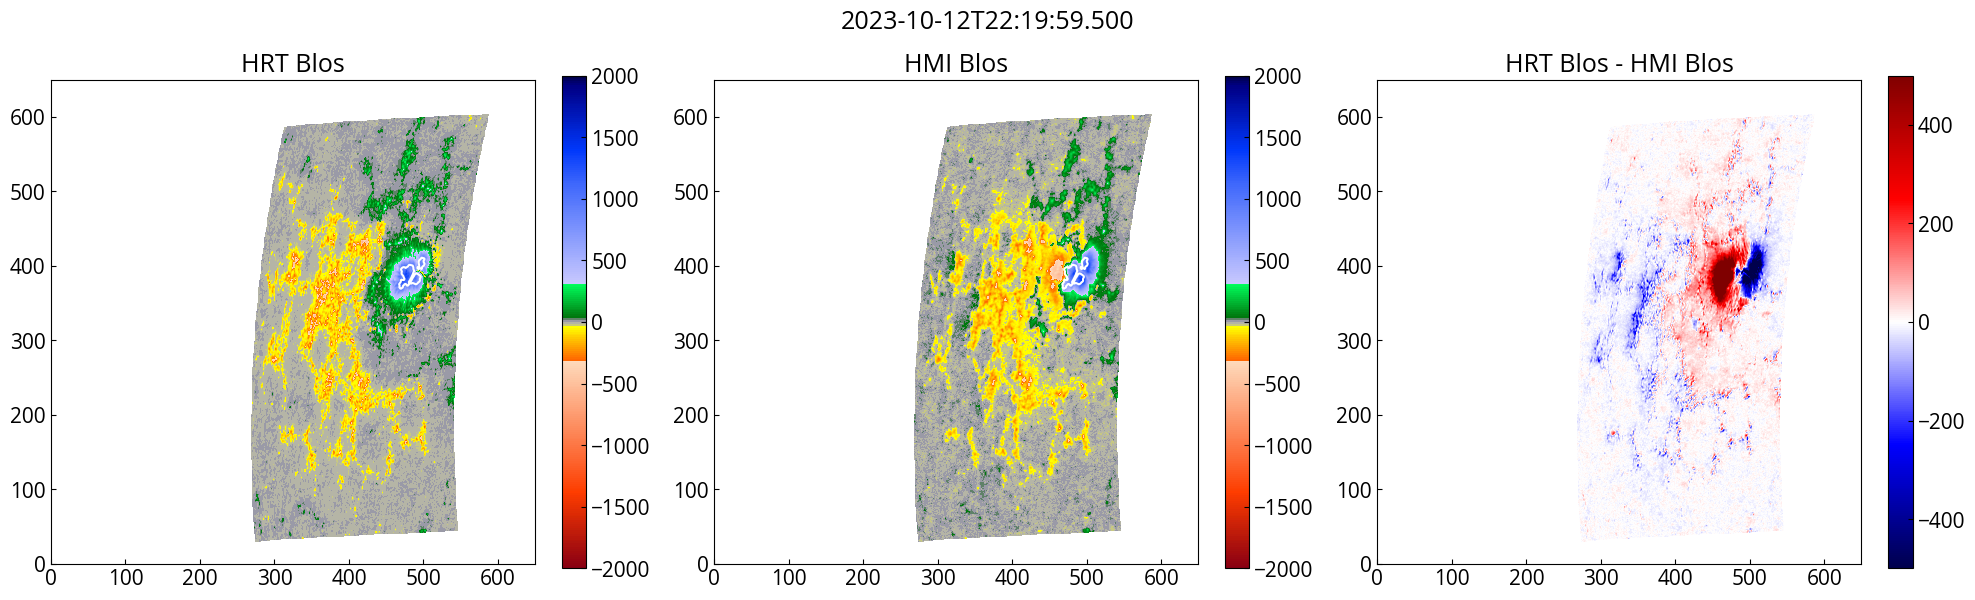

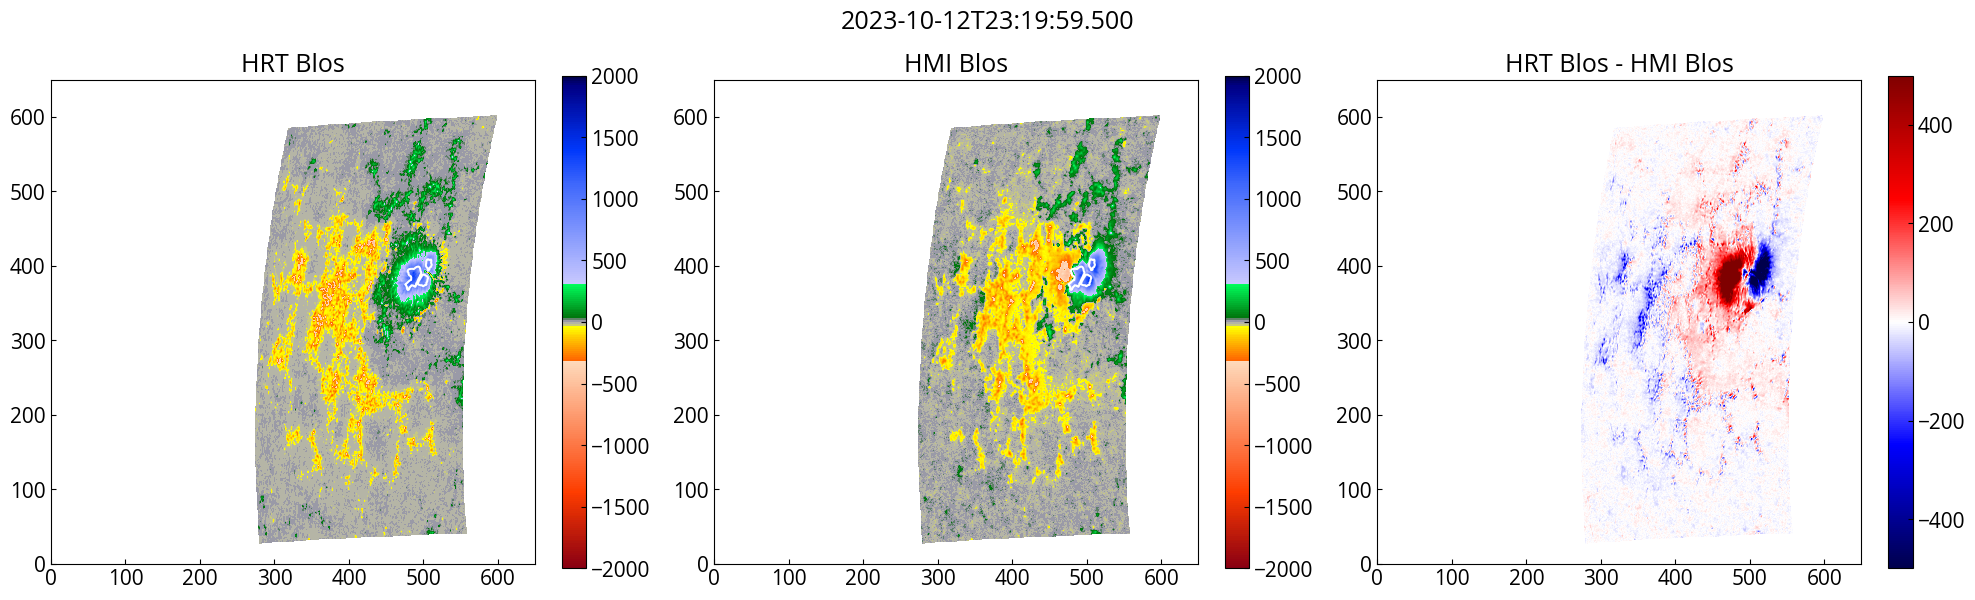

In [41]:
levels=0.38

for i in range(24):
    plt.figure(figsize=(20,6))
    plt.subplot(131)
    im=plt.imshow(hrt_arr[...,i],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
    CS = plt.contour(hmi_ic_arr[...,i], levels = [level], colors = "white")
    plt.suptitle(title[i])
    plt.title('HRT Blos')
    plt.colorbar(im,fraction=0.046)
    plt.subplot(132)
    plt.title('HMI Blos')
    im2=plt.imshow(hmi_arr[...,i],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
    CS = plt.contour(hmi_ic_arr[...,i], levels = [level], colors = "white")
    plt.colorbar(im2,fraction=0.046)
    plt.subplot(133)
    plt.title('HRT Blos - HMI Blos')
    plt.imshow(hrt_arr[...,i]-hmi_arr[...,i],origin="lower",cmap='seismic',vmin=-500,vmax=500)
    plt.colorbar(fraction=0.046)
    plt.tight_layout()
    plt.show()

# use original HMI continuum images to decide the extent of the sunspot umbra like before
- (can compre remapped HRT icnt later to see if any big differences)

In [16]:
import os

In [14]:
hmi_dir = '/data/slam/sinjan/arlongterm_hmi/ic_45/'

In [17]:
hmi_files = [i for i in os.listdir(hmi_dir) if '20231012' in i]

In [55]:
hmi_files

['hmi.ic_45s.20231012_002145_TAI.2.continuum.fits',
 'hmi.ic_45s.20231012_012145_TAI.2.continuum.fits',
 'hmi.ic_45s.20231012_022145_TAI.2.continuum.fits',
 'hmi.ic_45s.20231012_032145_TAI.2.continuum.fits',
 'hmi.ic_45s.20231012_042145_TAI.2.continuum.fits',
 'hmi.ic_45s.20231012_052145_TAI.2.continuum.fits',
 'hmi.ic_45s.20231012_062145_TAI.2.continuum.fits',
 'hmi.ic_45s.20231012_072145_TAI.2.continuum.fits',
 'hmi.ic_45s.20231012_082145_TAI.2.continuum.fits',
 'hmi.ic_45s.20231012_092145_TAI.2.continuum.fits',
 'hmi.ic_45s.20231012_102100_TAI.2.continuum.fits',
 'hmi.ic_45s.20231012_112100_TAI.2.continuum.fits',
 'hmi.ic_45s.20231012_122100_TAI.2.continuum.fits',
 'hmi.ic_45s.20231012_132100_TAI.2.continuum.fits',
 'hmi.ic_45s.20231012_142100_TAI.2.continuum.fits',
 'hmi.ic_45s.20231012_152100_TAI.2.continuum.fits',
 'hmi.ic_45s.20231012_162100_TAI.2.continuum.fits',
 'hmi.ic_45s.20231012_172100_TAI.2.continuum.fits',
 'hmi.ic_45s.20231012_182100_TAI.2.continuum.fits',
 'hmi.ic_45s

In [63]:
hmi_ic_arr=np.zeros((650,650,24))

for i,hfile in enumerate(hmi_files):
    smap = sunpy.map.Map(hmi_dir+hfile).rotate()
    norm = smap.data[1500:2500,1500:2500].mean()
    nans=np.isnan(hrt_arr[:,:,i])
    tmp = smap.data[1900:2550,:650]
    tmp[nans] = np.nan
    hmi_ic_arr[...,i] = tmp/norm

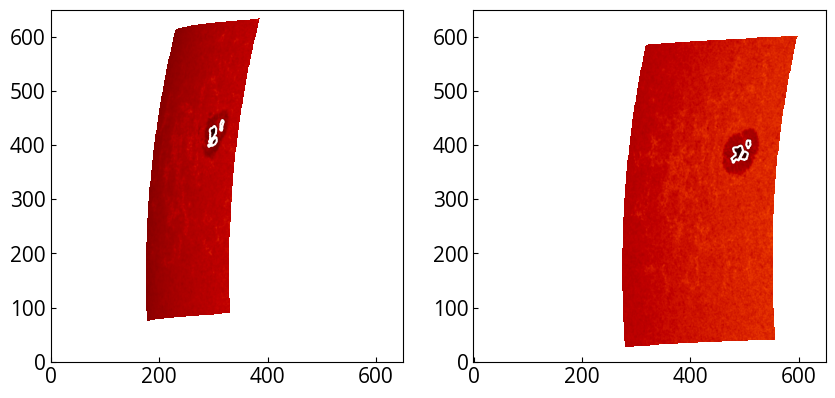

In [76]:
level=0.38

plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(hmi_ic_arr[...,0],origin="lower",cmap='gist_heat',vmin=0,vmax=1.4)
CS = plt.contour(hmi_ic_arr[...,0], levels = [level], colors = "white")
plt.clabel(CS)
plt.subplot(122)
plt.imshow(hmi_ic_arr[...,23],origin="lower",cmap='gist_heat',vmin=0,vmax=1.4)
CS = plt.contour(hmi_ic_arr[...,23], levels = [level], colors = "white")
plt.clabel(CS)
plt.show()

In [78]:
with open('/data/slam/sinjan/arlongterm_pickles/hmi_ic_cutout_20231012.pickle','wb') as f:
    cPickle.dump(hmi_ic_arr,f)

In [18]:
with open('/data/slam/sinjan/arlongterm_pickles/hmi_ic_cutout_20231012.pickle','rb') as f:
    hmi_ic_arr = cPickle.load(f)

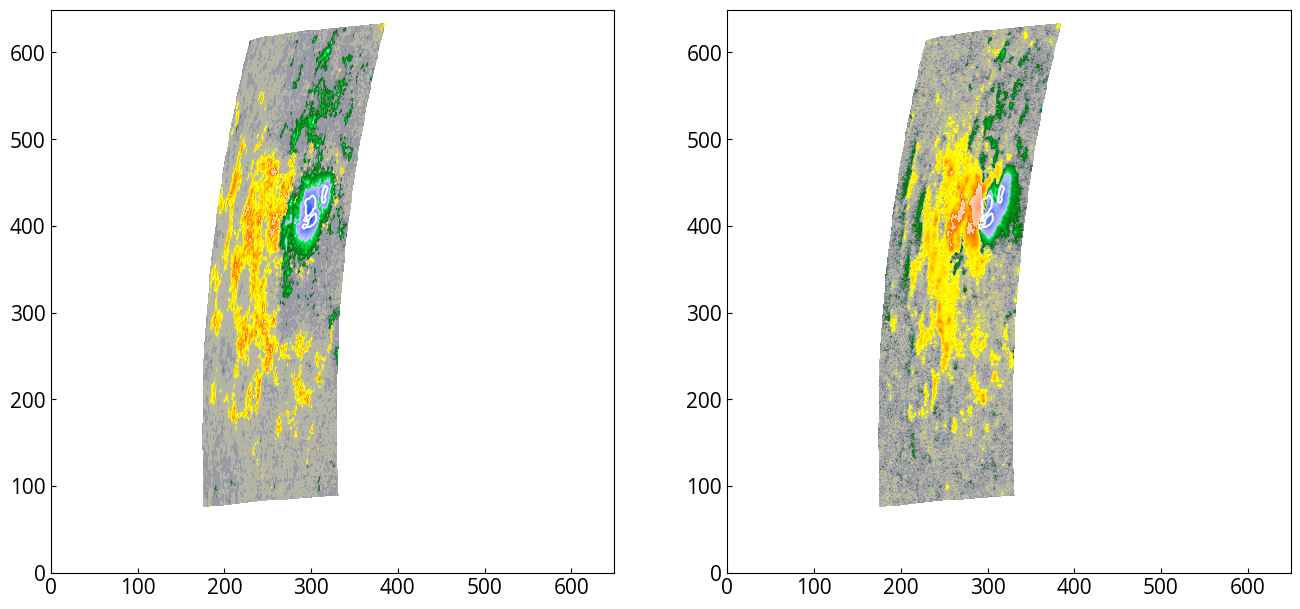

In [85]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(hrt_arr[...,0],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
CS = plt.contour(hmi_ic_arr[...,0], levels = [level], colors = "white")
plt.subplot(122)
plt.imshow(hmi_arr[...,0],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
CS = plt.contour(hmi_ic_arr[...,0], levels = [level], colors = "white")
#plt.clabel(CS)

In [86]:
# calc signed/unsigned flux in sunspot umbra for first day - using these white contours

In [12]:
hmisize=2.42407e-6*1.496e8*1e5

In [13]:
from datetime import datetime as dt
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%H:%M')

In [31]:
times = [dt.strptime(i.meta['date-obs'][:-4],'%Y-%m-%dT%H:%M:%S') for i in hrts]

In [89]:
hrts[0].meta['date-obs']

'2023-10-12T00:20:44.600'

In [33]:
tmp_ichrt=[]
tmp_ichmi=[]
hrt_blos_hist=[]
hmi_blos_hist=[]

for i in range(24):
    hmi_umbra=np.where(hmi_ic_arr[:,:,i]<=0.38)
    hrt_noise=np.where(np.abs(hrt_arr[:,:,i][hmi_umbra])>50)
    hmi_noise=np.where(np.abs(hmi_arr[:,:,i][hmi_umbra])>50)
    hrt_blos_hist.append(hrt_arr[:,:,i][hmi_umbra][hrt_noise])
    hmi_blos_hist.append(hmi_arr[:,:,i][hmi_umbra][hmi_noise])
    tmp_ichrt.append(np.sum(np.abs(hrt_arr[:,:,i][hmi_umbra][hrt_noise])))
    tmp_ichmi.append(np.sum(np.abs(hmi_arr[:,:,i][hmi_umbra][hmi_noise])))

hrt_blos_hist=np.concatenate(hrt_blos_hist,axis=-1)
hmi_blos_hist=np.concatenate(hmi_blos_hist,axis=-1)
tmp_ichrt=np.array(tmp_ichrt)
tmp_ichmi=np.array(tmp_ichmi)

In [34]:
tmp_sichrt=[]
tmp_sichmi=[]
#hrt_blos_hist=[]
#hmi_blos_hist=[]

for i in range(24):
    hmi_umbra=np.where(hmi_ic_arr[:,:,i]<=0.38)
    hrt_noise=np.where(np.abs(hrt_arr[:,:,i][hmi_umbra])>50)
    hmi_noise=np.where(np.abs(hmi_arr[:,:,i][hmi_umbra])>50)
    #hrt_blos_hist.append(hrt_arr[:,:,i][hmi_umbra][hrt_noise])
    #hmi_blos_hist.append(hmi_arr[:,:,i][hmi_umbra][hmi_noise])
    tmp_sichrt.append(np.sum(hrt_arr[:,:,i][hmi_umbra][hrt_noise]))
    tmp_sichmi.append(np.sum(hmi_arr[:,:,i][hmi_umbra][hmi_noise]))

#hrt_blos_hist=np.concatenate(hrt_blos_hist,axis=-1)
#hmi_blos_hist=np.concatenate(hmi_blos_hist,axis=-1)
tmp_sichrt=np.array(tmp_sichrt)
tmp_sichmi=np.array(tmp_sichmi)

In [43]:
tmp_ichrtmu=[]
tmp_ichmimu=[]
hrt_mus=[]
hmi_mus=[]

for i in range(24):
    hmi_umbra=np.where(hmi_ic_arr[:,:,i]<=0.38)
    hrt_noise=np.where(np.abs(hrt_arr[:,:,i][hmi_umbra])>50)
    hmi_noise=np.where(np.abs(hmi_arr[:,:,i][hmi_umbra])>50)
    hrt_mu=hrt_mu_arr[:,:,i][hmi_umbra][hrt_noise]
    hmi_mu=hmi_mu_arr[:,:,i][hmi_umbra][hmi_noise]
    hrt_mus.append(np.mean(hrt_mu))
    hmi_mus.append(np.mean(hmi_mu))
    tmp_ichrtmu.append(np.sum(np.abs(hrt_arr[:,:,i][hmi_umbra][hrt_noise]/hrt_mu)))
    tmp_ichmimu.append(np.sum(np.abs(hmi_arr[:,:,i][hmi_umbra][hmi_noise]/hmi_mu)))

hrt_mus=np.array(hrt_mus)
hmi_mus=np.array(hmi_mus)
tmp_ichrtmu=np.array(tmp_ichrtmu)
tmp_ichmimu=np.array(tmp_ichmimu)

In [45]:
hrt_mus

array([0.97604889, 0.97541156, 0.97460539, 0.97373729, 0.97275978,
       0.97181267, 0.97087699, 0.96987784, 0.96870971, 0.96774882,
       0.96657641, 0.96545347, 0.96421422, 0.96305062, 0.96174276,
       0.96047828, 0.95918023, 0.95782596, 0.95628996, 0.95467444,
       0.95330429, 0.95169367, 0.95026722, 0.948776  ])

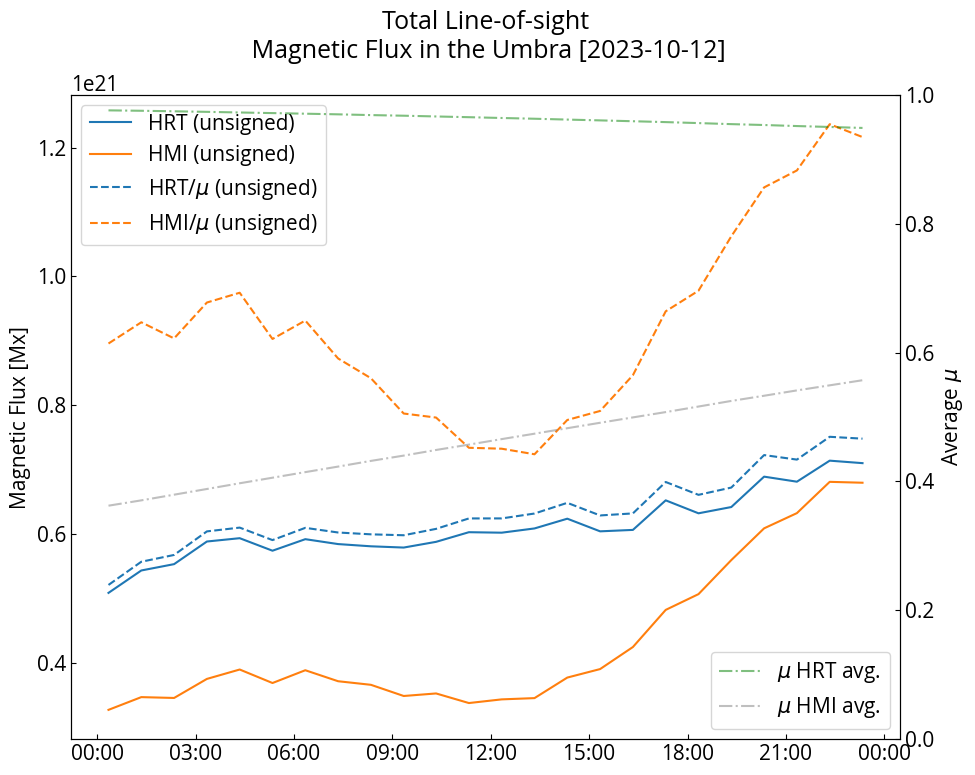

In [61]:
plt.figure(figsize=(10,8))
plt.plot(times,tmp_ichrt*hmisize**2,label=r'HRT (unsigned)',color='#1f77b4')
plt.plot(times,tmp_ichmi*hmisize**2,label=r'HMI (unsigned)',color='#ff7f0e')
#plt.plot(times,tmp_sichrt*hmisize**2,label=r'HRT (signed)',color='#1f77b4',linewidth=3,alpha=0.5)
#plt.plot(times,tmp_sichmi*hmisize**2,label=r'HMI (signed)',color='#ff7f0e',linewidth=3,alpha=0.5)
plt.plot(times,tmp_ichrtmu*hmisize**2,label=r'HRT/$\mu$ (unsigned)',color='#1f77b4',linestyle='--')
plt.plot(times,tmp_ichmimu*hmisize**2,label=r'HMI/$\mu$ (unsigned)',color='#ff7f0e',linestyle='--')
plt.ylabel('Magnetic Flux [Mx]')
plt.legend(loc='upper left')
ax=plt.gca()
ax2=ax.twinx()

ax2.plot(times,hrt_mus,label='$\mu$ HRT avg.', color='green',alpha=0.5,linestyle='-.')
ax2.plot(times,hmi_mus,label='$\mu$ HMI avg.', color='grey',alpha=0.5,linestyle='-.')
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.title(f'Total Line-of-sight\n Magnetic Flux in the Umbra [{times[0].date()}]\n')
plt.ylabel(r'Average $\mu$')
plt.xlabel('Time [UTC]')
ax=plt.gca()
ax.xaxis.set_major_formatter(myFmt)
plt.tight_layout()
plt.show()

In [19]:
with open(f"/data/slam/sinjan/arlongterm_pickles/HRTs_MU_remapped_on_HMI_20231012.pickle", "rb") as input_file:
    hrts_mu = cPickle.load(input_file)
    
with open(f"/data/slam/sinjan/arlongterm_pickles/HMIs_MU_target_20231012.pickle", "rb") as input_file:
    hmis_mu = cPickle.load(input_file)

In [20]:
hrt_mu_arr = np.zeros((650,650,24))

for i,smap in enumerate(hrts_mu):
     hrt_mu_arr[:,:,i] = smap.data[1900:2550,:650]
        
hmi_mu_arr = np.zeros((650,650,24))

for i,smap in enumerate(hmis_mu):
     nans = np.isnan(hrt_mu_arr[:,:,i])
     tmp = smap.data[1900:2550,:650]
     tmp[nans] = np.nan
     hmi_mu_arr[:,:,i] = tmp

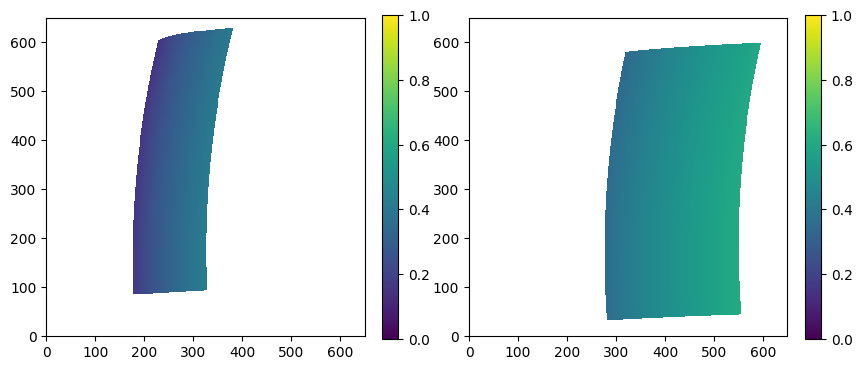

In [26]:
level=0.38

plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(hmi_mu_arr[...,0],origin="lower",cmap='viridis',vmin=0,vmax=1)
#CS = plt.contour(hmi_ic_arr[...,0], levels = [level], colors = "white")
#plt.clabel(CS)
plt.colorbar(fraction=0.046)
plt.subplot(122)
plt.imshow(hmi_mu_arr[...,23],origin="lower",cmap='viridis',vmin=0,vmax=1)
#CS = plt.contour(hmi_ic_arr[...,23], levels = [level], colors = "white")
#plt.clabel(CS)
plt.colorbar(fraction=0.046)
plt.show()